#COMORBILIDADES Y COVID - 19
**Bárbara Isabel Chávez Reveco RUT: 20.745.078-2** ;
**Daniela Francisca Tapia Barrera RUT: 21.226.041-k**

Durante el año 2020 se vivió una pandemia a nivel mundial impulsada por el virus SARS-CoV-2, o mejor conocido como COVID-19, perdurando en menor magnitud hasta la fecha. Esta pandemia afectó a población de todas las edades y géneros, registrándose una innumerable cantidad de casos de contagio de coronavirus, y una cifra no menor de muertes a causa de esta pandemia global. Por otra parte, existen diversas comorbilidades, en donde es más común de lo que pensamos encontrarnos con personas que padezcan alguna de ellas, estimándose que de una muestra de 99 pacientes, 50 de ellos padecen de comorbilidades.
El padecer una comorbilidad puede ser un factor de riesgo para un paciente contagiado de coronavirus, según estadísticas de “Comorbidities of COVID-19 Patients”, se observó que el 75% de los pacientes hospitalizados por COVID-19 padecen de al menos una comorbilidad, en donde las más comunes son hipertensión, diabetes, cáncer, inmunodeficiencia, enfermedades cardiovasculares, obesidad y enfermedades renales, por lo que dicho esto es posible concluir que existen diversas patologías que incrementan el nivel de gravedad en un paciente contagiado con coronavirus, siendo más probable en ellos ser hospitalizados, intubados e incluso, ingresados a la UCI.  
Es precisamente este último punto el que es abordado en este proyecto, como equipo de trabajo se buscó predecir el nivel de riesgo de un paciente contagiado de SARS-CoV-2 que padezca de alguna comorbilidad, cuyo proceso y resultados se despliegan a continuación, contando con una base de datos que fue pre procesada para luego ser trabajada, aplicando modelos de árboles de decisión y también regresión logística para así poder lograr el objetivo propuesto.
Para el desarrollo de esto, se aplicó el siguiente código de programación en Python, el cual está explicado paso a paso para que sea comprendido en su totalidad.


In [1]:
import numpy as np
import pandas as pd

En primer lugar, es necesario importar las librerías PANDAS y NUMPY

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Conectar Google Colab con Google Drive, y asi poder acceder a archivos y carpetas almacenadas allí, como por ejemplo, archivos csv

In [3]:
mydata = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Covid Data.csv')

Leer archivo CSV desde google Drive y cargar su contenido en un DataFrame de pandas llamado mydata, para poder analizar, manipular y procesar datos

# **PRE-PROCESAMIENTO DE LOS DATOS**


In [4]:
mydata.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


Visualizar las 5 primeras filas del DataFrame, para tener una ide ade cómo lucen los datos o verificar si los datos se cargaron correctamente

In [5]:
mydata.describe(include = "all")

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
unique,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,9999-99-99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,971633,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,NaN,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,...,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,NaN,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,...,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01


Generar resumen estadístico de todas las columnas del DataFrame mydata, independiente de si son datos de tipo numérico, categórico o de texto

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Obtener una visión general de las características de los datos

In [7]:
mydata['PREGNANT'].value_counts()

,count
PREGNANT,
97,523511
2,513179
1,8131
98,3754


Las líneas de código que se ven sirven para contar cuántas veces aparece cada valor numérico en la columna seleccionada, la cual en el primer caso es "PREGNANT", y luego se realiza con cada uno de los atributos. Esto se aplica con el fin de evaluar cuántos datos faltantes tenía cada colunma, ya que número 97 y 98 representaban valores faltantes (no se tenía esa información) y en el caso de 99 correspondía a que el paciente no presentaba fecha de fallecimiento, por lo tanto no había fallecido.

In [8]:
mydata['INTUBED'].value_counts()

,count
INTUBED,
97,848544
2,159050
1,33656
99,7325


In [9]:
mydata['DIABETES'].value_counts()

,count
DIABETES,
2,920248
1,124989
98,3338


In [10]:
mydata['COPD'].value_counts()

,count
COPD,
2,1030510
1,15062
98,3003


In [11]:
mydata['ASTHMA'].value_counts()

,count
ASTHMA,
2,1014024
1,31572
98,2979


In [12]:
mydata['INMSUPR'].value_counts()

,count
INMSUPR,
2,1031001
1,14170
98,3404


In [13]:
mydata['HIPERTENSION'].value_counts()

,count
HIPERTENSION,
2,882742
1,162729
98,3104


In [14]:
mydata['OTHER_DISEASE'].value_counts()

,count
OTHER_DISEASE,
2,1015490
1,28040
98,5045


In [15]:
mydata['CARDIOVASCULAR'].value_counts()

,count
CARDIOVASCULAR,
2,1024730
1,20769
98,3076


In [16]:
mydata['OBESITY'].value_counts()

,count
OBESITY,
2,885727
1,159816
98,3032


In [17]:
mydata['RENAL_CHRONIC'].value_counts()

,count
RENAL_CHRONIC,
2,1026665
1,18904
98,3006


In [18]:
mydata['TOBACCO'].value_counts()

,count
TOBACCO,
2,960979
1,84376
98,3220


In [19]:
mydata['CLASIFFICATION_FINAL'].value_counts()

,count
CLASIFFICATION_FINAL,
7,499250
3,381527
6,128133
5,26091
1,8601
4,3122
2,1851


In [20]:
mydata['ICU'].value_counts()

,count
ICU,
97,848544
2,175685
1,16858
99,7488


In [21]:
mydata['INTUBED'] = mydata['INTUBED'].replace([99, 97], 2)
mydata['INTUBED'].value_counts()

,count
INTUBED,
2,1014919
1,33656


Buscar los valores 97 y 98 en la columna especificada, en el primer caso es "INTUBED", y los reemplaza por el valor 2, el cual es la moda. Luego, realiza un conteo de la columna con los nuevos valores, con el fin de verificar que no exista ningún valor faltante. Se aplica el mismo procedimiento para los demás atributos

In [22]:
mydata['ICU'] = mydata['ICU'].replace([99, 97], 2)
mydata['ICU'].value_counts()

,count
ICU,
2,1031717
1,16858


In [23]:
mydata['DATE_DIED'].value_counts()

,count
DATE_DIED,
9999-99-99,971633
06/07/2020,1000
07/07/2020,996
13/07/2020,990
16/06/2020,979
...,...
24/11/2020,1
17/12/2020,1
08/12/2020,1


In [24]:
print(mydata['DATE_DIED'].unique())

['03/05/2020' '03/06/2020' '09/06/2020' '12/06/2020' '21/06/2020'
 '9999-99-99' '26/02/2020' '05/04/2020' '08/05/2020' '20/05/2020'
 '17/07/2020' '13/01/2020' '22/01/2020' '29/01/2020' '13/02/2020'
 '18/02/2020' '19/02/2020' '20/02/2020' '24/02/2020' '04/03/2020'
 '07/03/2020' '12/03/2020' '14/03/2020' '18/03/2020' '27/03/2020'
 '28/03/2020' '29/03/2020' '02/04/2020' '06/04/2020' '07/04/2020'
 '08/04/2020' '09/04/2020' '10/04/2020' '11/04/2020' '12/04/2020'
 '13/04/2020' '14/04/2020' '15/04/2020' '16/04/2020' '17/04/2020'
 '18/04/2020' '20/04/2020' '21/04/2020' '22/04/2020' '23/04/2020'
 '24/04/2020' '25/04/2020' '26/04/2020' '27/04/2020' '28/04/2020'
 '29/04/2020' '30/04/2020' '01/05/2020' '02/05/2020' '04/05/2020'
 '05/05/2020' '06/05/2020' '07/05/2020' '09/05/2020' '10/05/2020'
 '11/05/2020' '12/05/2020' '13/05/2020' '14/05/2020' '15/05/2020'
 '16/05/2020' '17/05/2020' '18/05/2020' '19/05/2020' '21/05/2020'
 '22/05/2020' '23/05/2020' '24/05/2020' '25/05/2020' '26/05/2020'
 '27/05/20

Verificar y mostrar fechas presentes en la columna "DATE_DIED", identificando si hay valores erróneos o inesperados

In [25]:
# Cambiar los valores iguales a '9999-99-99' a 2
mydata.loc[mydata['DATE_DIED'] == '9999-99-99', 'DATE_DIED'] = 2

# Cambiar los valores distintos de '9999-99-99' (y que no son 2) a 1
mydata.loc[(mydata['DATE_DIED'] != '9999-99-99') & (mydata['DATE_DIED'] != 2), 'DATE_DIED'] = 1

La columna "DATE_DIED" contiene fechas, para luego poder aplicar modelos de Machine Learning es necesario cambiar esta variable a una de tipo numérica, por lo que se aplica el siguiente código, en donde el número 2 corresponde a que el paciente no murió y en caso contrario, un número 1, que quiere decir que el paciente si falleció producto a un contagio COVID-19

A continuación, se siguen verificando los valores que poseen distintos atributos

In [26]:
mydata['DATE_DIED'].value_counts()

,count
DATE_DIED,
2,971633
1,76942


In [27]:
mydata['PATIENT_TYPE'].value_counts()

,count
PATIENT_TYPE,
1,848544
2,200031


In [28]:
mydata['SEX'].value_counts()

,count
SEX,
1,525064
2,523511


In [29]:
mydata['MEDICAL_UNIT'].value_counts()

,count
MEDICAL_UNIT,
12,602995
4,314405
6,40584
9,38116
3,19175
8,10399
10,7873
5,7244
11,5577


In [30]:
mydata['USMER'].value_counts()

,count
USMER,
2,662903
1,385672


In [31]:
mydata['PNEUMONIA'].value_counts()

,count
PNEUMONIA,
2,892534
1,140038
99,16003


In [32]:
mydata['AGE'].value_counts()

,count
AGE,
30,27010
31,25927
28,25313
29,25134
34,24872
...,...
114,2
116,2
111,1


In [33]:
mydata = mydata.drop(['PREGNANT'], axis=1)

Eliminar la columna "PREGNANT", puedo que para fines de este proyecto no califica, ya que no es considerada como una comorbilidad

In [34]:
moda = mydata['DIABETES'].mode()
mydata['DIABETES'] = mydata['DIABETES'].replace([98], moda)

Calcular la moda de la columna "DIABETES" y luego reemplazar los valor 98 (faltantes) por el valor equivalente a la moda de este atributo

In [35]:
mydata['DIABETES'].value_counts()

,count
DIABETES,
2,923586
1,124989


Verificar que el cambio se haya realizado de forma correcta


A continuación, se aplican las mismas líneas de código, cambiando el nombre del atributo, para así continuar reemplazando los valores faltantes por su moda, ya que es lo más representativo, junto con esto, se realiza la verificación de que el cambio se haya realizado de forma correcta

In [36]:
moda = mydata['COPD'].mode()
mydata['COPD'] = mydata['COPD'].replace([98], moda)

In [37]:
mydata['DIABETES'].value_counts()

,count
DIABETES,
2,923586
1,124989


In [38]:
moda = mydata['ASTHMA'].mode()
mydata['ASTHMA'] = mydata['ASTHMA'].replace([98], moda)

In [39]:
mydata['DIABETES'].value_counts()

,count
DIABETES,
2,923586
1,124989


In [40]:
moda = mydata['HIPERTENSION'].mode()
mydata['HIPERTENSION'] = mydata['HIPERTENSION'].replace([98], moda)

In [41]:
mydata['DIABETES'].value_counts()

,count
DIABETES,
2,923586
1,124989


In [42]:
moda = mydata['OTHER_DISEASE'].mode()
mydata['OTHER_DISEASE'] = mydata['OTHER_DISEASE'].replace([98], moda)

In [43]:
mydata['OTHER_DISEASE'].value_counts()

,count
OTHER_DISEASE,
2,1020535
1,28040


In [44]:
moda = mydata['INMSUPR'].mode()
mydata['INMSUPR'] = mydata['INMSUPR'].replace([98], moda)
mydata['INMSUPR'].value_counts()

,count
INMSUPR,
2,1034405
1,14170


In [45]:
moda = mydata['CARDIOVASCULAR'].mode()
mydata['CARDIOVASCULAR'] = mydata['CARDIOVASCULAR'].replace([98], moda)
mydata['CARDIOVASCULAR'].value_counts()

,count
CARDIOVASCULAR,
2,1027806
1,20769


In [46]:
moda = mydata['OBESITY'].mode()
mydata['OBESITY'] = mydata['OBESITY'].replace([98], moda)
mydata['OBESITY'].value_counts()

,count
OBESITY,
2,888759
1,159816


In [47]:
moda = mydata['TOBACCO'].mode()
mydata['TOBACCO'] = mydata['TOBACCO'].replace([98], moda)
mydata['TOBACCO'].value_counts()

,count
TOBACCO,
2,964199
1,84376


In [48]:
moda = mydata['PNEUMONIA'].mode()
mydata['PNEUMONIA'] = mydata['PNEUMONIA'].replace([99], moda)
mydata['PNEUMONIA'].value_counts()

,count
PNEUMONIA,
2,908537
1,140038


In [49]:
moda = mydata['ASTHMA'].mode()
print (moda)

0    2
Name: ASTHMA, dtype: int64


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = mydata.select_dtypes(include = ['number'])
corr = numeric_columns.corr()
print(corr)

                         USMER  MEDICAL_UNIT       SEX  PATIENT_TYPE  \
USMER                 1.000000      0.127927 -0.001126     -0.190570   
MEDICAL_UNIT          0.127927      1.000000  0.001475     -0.205413   
SEX                  -0.001126      0.001475  1.000000      0.089505   
PATIENT_TYPE         -0.190570     -0.205413  0.089505      1.000000   
INTUBED               0.073284      0.098304 -0.053619     -0.375063   
PNEUMONIA             0.142059      0.104031 -0.080740     -0.643106   
AGE                  -0.045088     -0.082223  0.028367      0.315193   
DIABETES              0.056461      0.071993 -0.010843     -0.255087   
COPD                  0.026529      0.035821 -0.003128     -0.118636   
ASTHMA                0.013999      0.017386  0.044139      0.010906   
INMSUPR               0.016516      0.030460  0.006550     -0.093463   
HIPERTENSION          0.053142      0.091818 -0.002813     -0.231593   
OTHER_DISEASE         0.024221      0.115792  0.022573     -0.09

Mostrar matriz de correlación para las columnas del dataframe, esto ayuda a comprender relaciones entre variables numéricas en el conjunto de datos. Se importan también, las bibliotecas necesarias para la visualización de datos y creación de gráficos (seaborn y matplotlib.pyplot).

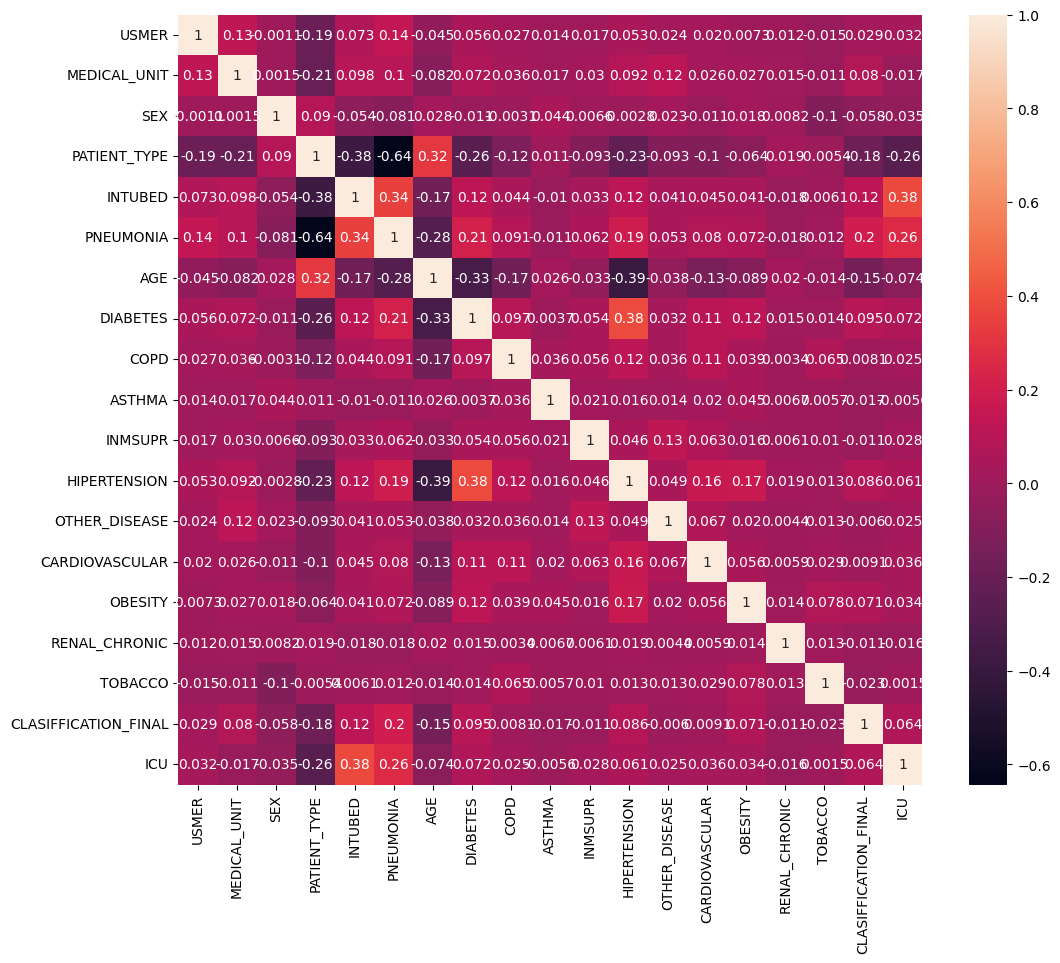

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)
plt.show()

El código crea un mapa de calor (heatmap) para visualizar la matriz de correlación que se calculó previamente. Este mapa facilita la identificación de las relaciones entre las variables numéricas.

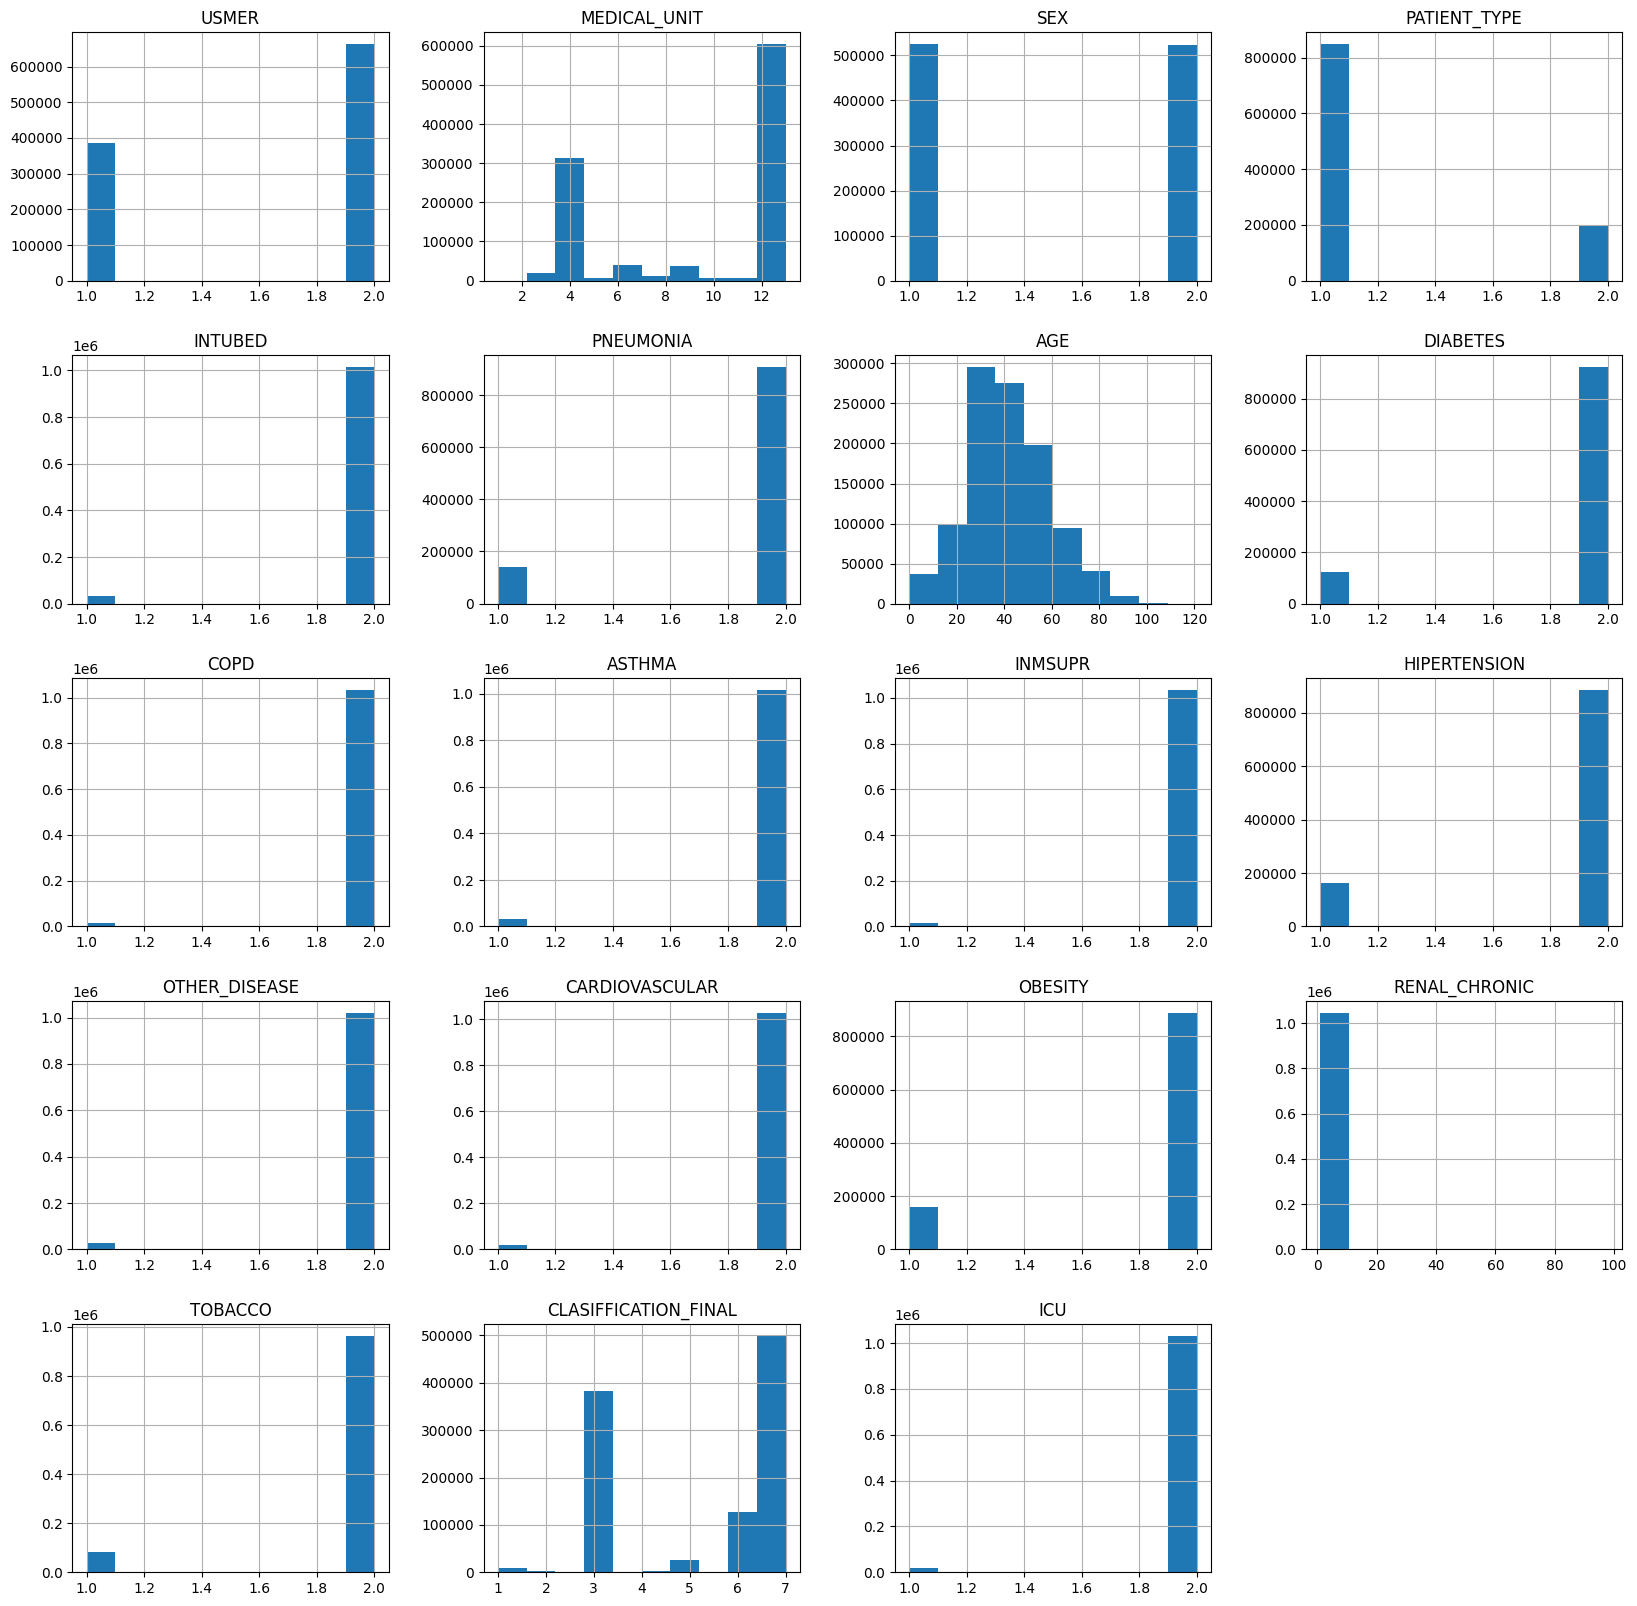

In [52]:
import matplotlib.pyplot as plt
mydata.hist(figsize=(20,20))
plt.show()

Creación de histogramas con el objetivo de visualizar la distribución de los datos, realiza un histograma por cada atributo.

In [53]:
moda = mydata['RENAL_CHRONIC'].mode()
mydata['RENAL_CHRONIC'] = mydata['RENAL_CHRONIC'].replace([98], moda)
mydata['RENAL_CHRONIC'].value_counts()

,count
RENAL_CHRONIC,
2,1029671
1,18904


Faltó realizar este reemplazo en las líneas anteriores, por lo que se agrega aquí.

#APLICACIÓN DE ALGORITMOS DE MACHINE LEARNING

In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Generar un conjunto de datos desbalanceado de muestra
X, y = make_classification(n_classes=3, class_sep=2,
                           weights=[0.9, 0.05, 0.05], n_informative=3, n_redundant=0,
                           n_clusters_per_class=1, n_samples=1000, random_state=0)

print('Original dataset shape %s' % Counter(y))

# Aplicar SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 890, 2: 57, 1: 53})
Resampled dataset shape Counter({0: 890, 2: 890, 1: 890})


Este código demuestra cómo utilizar SMOTE para abordar el problema del desbalance de clases en un conjunto de datos. Al generar nuevos ejemplos sintéticos de la clase minoritaria, SMOTE ayuda a crear un conjunto de datos más equilibrado y mejora el rendimiento de los modelos de aprendizaje automático.

In [55]:
mydata.loc[:, "PNEUMONIA"] = mydata["PNEUMONIA"].replace({1: 0, 2: 1}) #0 si tiene la comorbilidad y 1 no la tiene

In [56]:
mydata.loc[:, "DIABETES"] = mydata["DIABETES"].replace({1: 0, 2: 1})

In [57]:
mydata.loc[:, "COPD"] = mydata["COPD"].replace({1: 0, 2: 1})

In [58]:
mydata.loc[:, "ASTHMA"] = mydata["ASTHMA"].replace({1: 0, 2: 1})

In [59]:
mydata.loc[:, "INMSUPR"] = mydata["INMSUPR"].replace({1: 0, 2: 1})

In [60]:
mydata.loc[:, "HIPERTENSION"] = mydata["HIPERTENSION"].replace({1: 0, 2: 1})

In [61]:
mydata.loc[:, "CARDIOVASCULAR"] = mydata["CARDIOVASCULAR"].replace({1: 0, 2: 1})

In [62]:
mydata.loc[:, "OBESITY"] = mydata["OBESITY"].replace({1: 0, 2: 1})

In [63]:
mydata.loc[:, "RENAL_CHRONIC"] = mydata["RENAL_CHRONIC"].replace({1: 0, 2: 1})

In [64]:
mydata.loc[:, "TOBACCO"] = mydata["TOBACCO"].replace({1: 0, 2: 1})

In [65]:
mydata.loc[:, "ICU"] = mydata["ICU"].replace({1: 0, 2: 1})

In [66]:
mydata.loc[:, "INTUBED"] = mydata["INTUBED"].replace({1: 0, 2: 1})

In [67]:
mydata.loc[:, "DATE_DIED"] = mydata["DATE_DIED"].replace({1: 0, 2: 1})

<ipython-input-67-2f8334ca54f4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mydata.loc[:, "DATE_DIED"] = mydata["DATE_DIED"].replace({1: 0, 2: 1})


Transformar los valores de todas las variables a 0 y 1, ya que una representación binaria más sencilla de interpretar y utilizar en posteriores análisis

# **Regresión Logística 1, aplicada para la variable a predecir "ICU"**

La variable a predecir "ICU" se refiere a si el paciente con coronavirus debió ser ingresado a la Unidad de Cuidados Intensivos UCI tras su contagio con el virus o no.

In [68]:
X =mydata[["PNEUMONIA", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO"]]
y = mydata["ICU"]

Seleccionar las comorbilidades que serán parte de “X”, es decir, la variable independiente y el outcome, en este caso “y”.

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Dividir los datos en dos conjuntos: uno para entrenar y otro para probar. La proporción de división que utilizamos fue 70% de entrenamiento y 30% para prueba.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Estandarizar los datos numéricos de los conjuntos de entrenamiento (X_train) y de prueba (X_test). La estandarización transforma los datos para que tengan una media de 0 y una desviación estándar de 1, lo que mejora el rendimiento de muchos algoritmos de aprendizaje automático y facilita la comparación entre diferentes variables.

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Eliminar filas con al menos un valor faltante y restablecer índices
mydata = mydata.dropna().reset_index(drop=True)

# Verificar si quedan valores faltantes
print(mydata.isnull().sum())

# Separar en X e y
X = mydata[["PNEUMONIA", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO"]]
y = mydata["ICU"]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelo de regresión logística
model = LogisticRegression(solver='sag')
model.fit(X_scaled, y)

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


LogisticRegression(solver='sag')

In [72]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
log_model = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
log_model.fit(X_train, y_train)

LogisticRegression()

Crear modelo de regresión logística

In [73]:
df = pd.DataFrame(mydata)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,0,1,0,65,1,1,1,1,0,2,1,1,1,1,3,1
1,2,1,2,1,0,1,0,72,1,1,1,1,0,2,1,0,0,1,5,1
2,2,1,2,2,0,0,1,55,0,1,1,1,1,2,1,1,1,1,3,1
3,2,1,1,1,0,1,1,53,1,1,1,1,1,2,1,1,1,1,7,1
4,2,1,2,1,0,1,1,68,0,1,1,1,0,2,1,1,1,1,3,1


In [74]:
coefficients = pd.DataFrame(log_model.coef_.T, index=X.columns, columns=[f'Clase {i+1}' for i in range(log_model.coef_.shape[0])])
print(coefficients)

                 Clase 1
PNEUMONIA       1.168194
DIABETES        0.057854
COPD           -0.010512
ASTHMA         -0.036457
INMSUPR         0.041974
HIPERTENSION    0.026310
CARDIOVASCULAR  0.038363
OBESITY         0.082984
RENAL_CHRONIC  -0.007563
TOBACCO        -0.017550


Mostrar oeficientes del modelo de regresión logóstica, que puede ser útil para interpretar la importancia de cada característica en la predicción

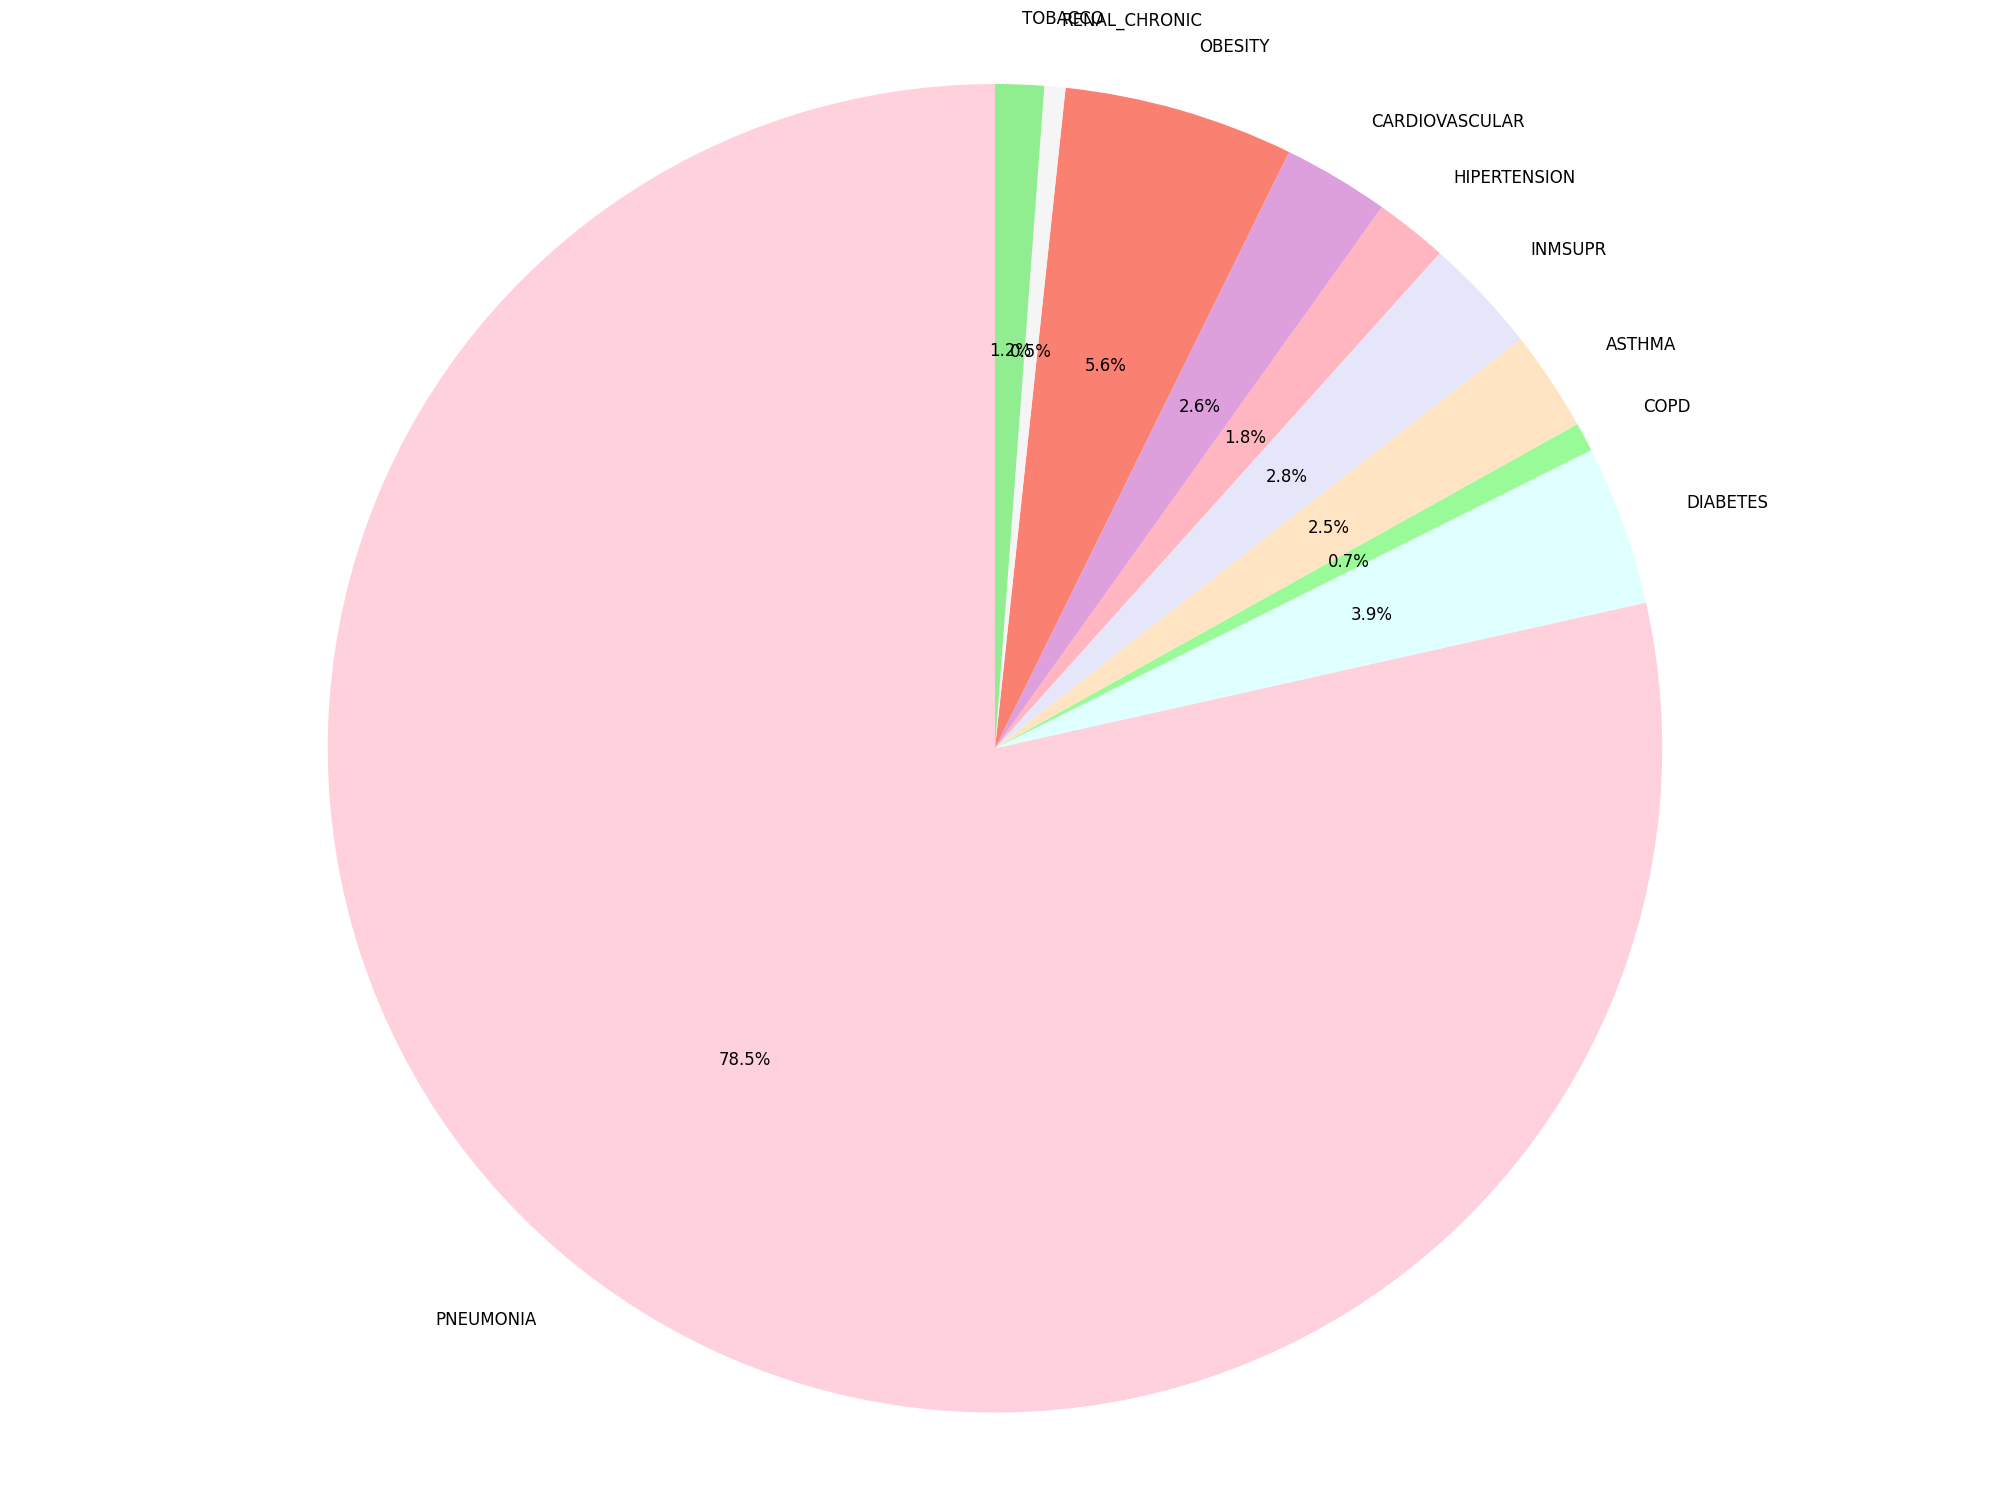

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

coefficients = pd.DataFrame(log_model.coef_.T, index=X.columns, columns=[f'Clase {i+1}' for i in range(log_model.coef_.shape[0])])

# Create the pie chart
plt.figure(figsize=(20, 15))

# Pastel color palette
colors = ['#FFD1DC', '#E0FFFF', '#98FB98', '#FFE4C4', '#E6E6FA', '#FFB6C1', '#DDA0DD', '#FA8072', '#F5F5F5', '#90EE90']

plt.pie(abs(coefficients['Clase 1']), labels=coefficients.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.axis('equal')
plt.tight_layout()
plt.show()

Craer gráficos para visualizar los coeficientes

In [76]:
# Predicciones en el conjunto de prueba
y_pred = log_model.predict(X_test)

# Crear el DataFrame con los valores reales (y_test) y predichos (y_pred)
comparison_df = pd.DataFrame({
    'Valor Real (y_test)': y_test,
    'Predicción (y_pred)': y_pred
})

# Añadir una columna que indique si la predicción fue correcta
comparison_df['Es Correcto'] = comparison_df['Valor Real (y_test)'] == comparison_df['Predicción (y_pred)']

# Mostrar las primeras filas del DataFrame
comparison_df.head(100)

,Valor Real (y_test),Predicción (y_pred),Es Correcto
781974,1,1,True
937737,1,1,True
907828,1,1,True
784628,1,1,True
662460,1,1,True
...,...,...,...
230393,1,1,True
444826,1,1,True
275014,1,1,True
100812,1,1,True


Mostrar resultados de predicciones realizadas

In [77]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusión:\n{conf_matrix}')

Matriz de Confusión:
[[     0   5071]
 [     0 309502]]


Realizar matriz de confusión, para conocer el desmpeño y posibles sesgos en las variables

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

Accuracy: 0.9838797353873345
Precision: 0.9838797353873345
Recall: 1.0
F1-score: 0.991874374073629


Calcular métricas de evaluación, para concoer desempeño de la regresión logística

In [79]:
import seaborn as sns
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Evaluar el rendimiento de modelos de clasificación y visualizar una matriz de confusión en forma de mapa de calor.

In [80]:
from sklearn.metrics import accuracy_score

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

Exactitud: 0.9838797353873345


Exactitud de la regresión logística

In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE para sobremuestrear la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Crear y entrenar el modelo de regresión logística con los datos remuestreados
log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled)


# Realizar predicciones en el conjunto de prueba
y_pred = log_model.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusión:\n{conf_matrix}')

Matriz de Confusión:
[[  4226    845]
 [ 38027 271475]]


Aplicar técnica SMOTE, para generar datos extra de la clase con menos datos y así eliminar sesgos. Y realiza nuevas predicciones

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Choose the appropriate metric function based on your needs:
# For accuracy:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# For precision:
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# For recall:
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# For F1-score:
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

Accuracy: 0.8764293184729777
Precision: 0.9968970329024677
Recall: 0.8771348811962443
F1-score: 0.9331891884459508


Calcular nuevas métricas

In [83]:
# Contar la cantidad de predicciones correctas e incorrectas
conteo_resultados = comparison_df['Es Correcto'].value_counts()

# Mostrar el resultado
print(conteo_resultados)

Es Correcto
True     309502
False      5071
Name: count, dtype: int64


Conocer desempeño en cuanto a predicciones correctas e incorrectas

In [84]:
import numpy as np
import pandas as pd

num_predictions = 5
X_new = pd.DataFrame({
    'PNEUMONIA': np.random.randint(0, 2, num_predictions),
    'DIABETES': np.random.randint(0, 2, num_predictions),
    'COPD': np.random.randint(0, 2, num_predictions),
    'ASTHMA': np.random.randint(0, 2, num_predictions),
    'INMSUPR': np.random.randint(0, 2, num_predictions),
    'HIPERTENSION': np.random.randint(0, 2, num_predictions),
    'CARDIOVASCULAR': np.random.randint(0, 2, num_predictions),
    'OBESITY': np.random.randint(0, 2, num_predictions),
    'RENAL_CHRONIC': np.random.randint(0, 2, num_predictions),
    'TOBACCO': np.random.randint(0, 2, num_predictions)
})
predictions = log_model.predict(X_new)

probabilities = log_model.predict_proba(X_new)

print("Predictions:", predictions)
print("Probabilities:", probabilities)

Predictions: [0 1 1 1 1]
Probabilities: [[0.95320677 0.04679323]
 [0.40103994 0.59896006]
 [0.37533875 0.62466125]
 [0.37323946 0.62676054]
 [0.1978708  0.8021292 ]]


Crear datos aleatorios para que el modelo haga su respectiva predicción

In [85]:
from sklearn.metrics import accuracy_score

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

Exactitud: 0.8764293184729777


Calcular exactitud del modelo

AUC-ROC: 0.8772590267245189


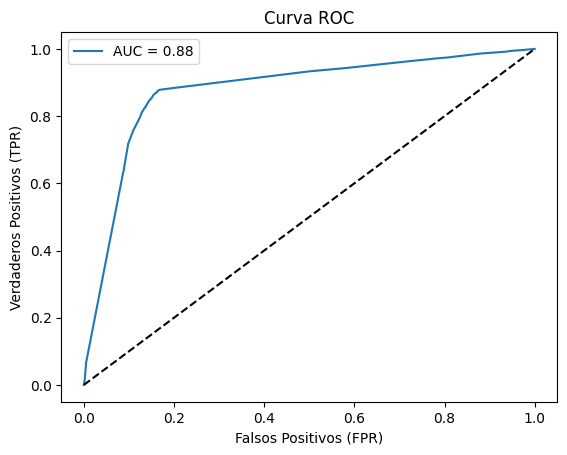

In [86]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular la probabilidad de la clase positiva
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc}')

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia (modelo aleatorio)
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

Curva ROC

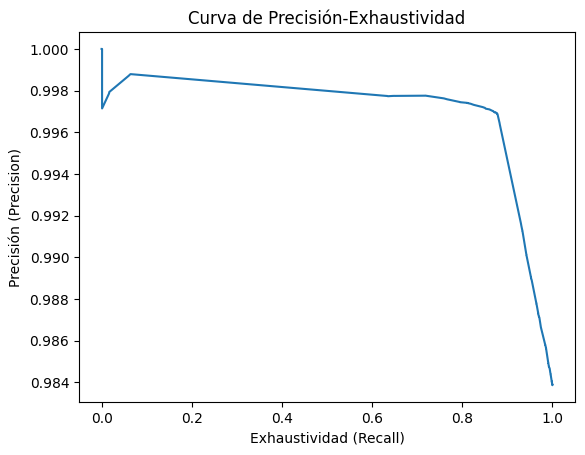

In [87]:
from sklearn.metrics import precision_recall_curve

# Calcular los valores de precisión y exhaustividad para varios umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Graficar la curva de precisión-exhaustividad
plt.plot(recall, precision)
plt.xlabel('Exhaustividad (Recall)')
plt.ylabel('Precisión (Precision)')
plt.title('Curva de Precisión-Exhaustividad')
plt.show()

Curva AUC

**Regresión logística 1:** Al interpretar los coeficientes, se pueden realizar las siguientes observaciones
Neumonía (“PNEUMONIA”) es la comorbilidad que tiene el mayor impacto positivo en la probabilidad de ingresar a la UCI.
Obesidad (“OBESITY”) también tiene un impacto positivo significativo en la probabilidad de ser ingresado a UCI.
El resto de las comorbilidades parecen tener un impacto negativo en la probabilidad de ingresar a UCI. Sin embargo este impacto es muy pequeño.

Por otra parte, los resultados de presicón fueron los soguientes
- El modelo ha clasificado correctamente el 87,64% de las muestras.
- El modelo tiene una probabilidad del 99,96% de realizar predicciones positivas
- El  modelo identifica correctamente el 87.71% de los casos positivos.
- El F1-score es una medida balanceada de precisión y recall. Este 0,9332 indica que el modelo tiene un buen equilibrio entre ambos.

Finalmente, el valor AUC-ROC, 0.87 en este caso resume el rendimiento general del modelo, en donde valores cercanos a 1 indican un buen modelo, mientras que menor a 0.5 indica un modelo sin poder predictivo.En este caso, significa que en promedio, el modelo es capaz de distinguir correctamente entre las dos clases en un 88% de los casos. En la curva de precisión - exhaustividad se muestra una tendencia general a disminuir a medida que aumenta la exhaustividad, es decir, refleja la dificultad de lograr una alta precisión y una alta exhaustividad al mismo tiempo, ya que al tratar de aumentar la exhaustividad (identificar más casos positivos), es probable que se incluyan algunos falsos positivos, lo que disminuye la precisión.



# **Árbol de decisión 1, aplicado a variable a predecir "ICU"**

In [88]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Importar librerias necesarias para árbol de decisión

In [90]:
dt = DecisionTreeClassifier(random_state = 1)

Crear instancia de la clase con estado aleatorio fijo de 1

In [91]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Construir árbol de decisión

              precision    recall  f1-score   support

           0       0.10      0.83      0.18      5071
           1       1.00      0.88      0.93    309502

    accuracy                           0.88    314573
   macro avg       0.55      0.86      0.56    314573
weighted avg       0.98      0.88      0.92    314573



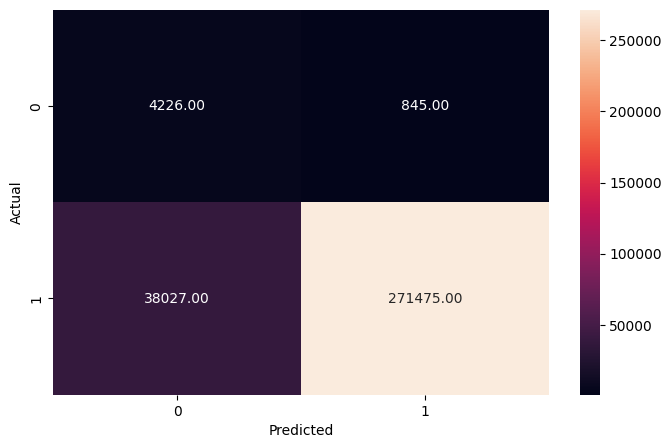

Accuracy: 0.8764293184729777


In [92]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    accuracy = accuracy_score(actual, predicted)
    print(f'Accuracy: {accuracy}')

metrics_score(y_test, y_pred)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

              precision    recall  f1-score   support

           0       0.67      0.00      0.00     11787
           1       0.98      1.00      0.99    722215

    accuracy                           0.98    734002
   macro avg       0.83      0.50      0.50    734002
weighted avg       0.98      0.98      0.98    734002



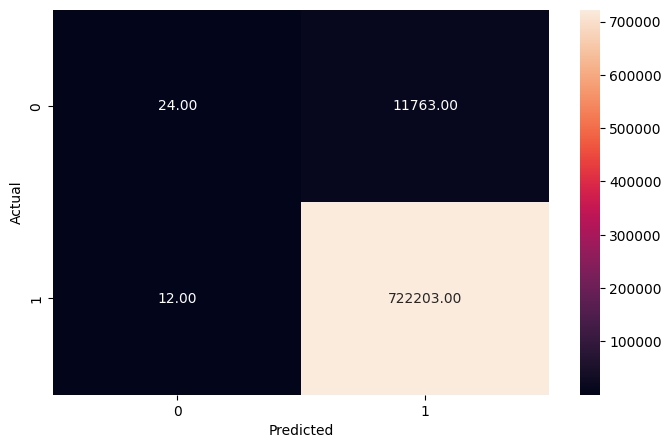

Accuracy: 0.983957809379266


In [93]:
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

Evaluar el rendimiento de un modelo de árbol de decisión en el conjunto de datos con el que fue entrenado.

In [94]:
import pandas as pd

y_test_pred_dt = dt.predict(X_test)

y_test_df = pd.DataFrame(y_test_pred_dt)
y_test_df.value_counts()

,count
0,
1,314555
0,18


Encarga de evaluar el rendimiento de un modelo de árbol de decisión en un conjunto de datos que el modelo no ha visto durante el entrenamiento.

[Text(0.5, 0.875, 'node #0\nPNEUMONIA <= 0.5\ngini = 0.032\nsamples = 734002\nvalue = [11787, 722215]\nclass = y[1]'),
 Text(0.25, 0.625, 'node #1\nOBESITY <= 0.5\ngini = 0.179\nsamples = 98069\nvalue = [9723, 88346]\nclass = y[1]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'node #2\nRENAL_CHRONIC <= 0.5\ngini = 0.207\nsamples = 21526\nvalue = [2524, 19002]\nclass = y[1]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #287\nDIABETES <= 0.5\ngini = 0.17\nsamples = 76543\nvalue = [7199, 69344]\nclass = y[1]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #616\nDIABETES <= 0.5\ngini = 0.006\nsamples = 635933\nvalue = [2064, 633869]\nclass = y[1]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'node #617\nRENAL_CHRONIC <= 0.5\ngini = 0.015\nsamples = 58478\nvalue = [455, 58023]\nclass = y[1]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (

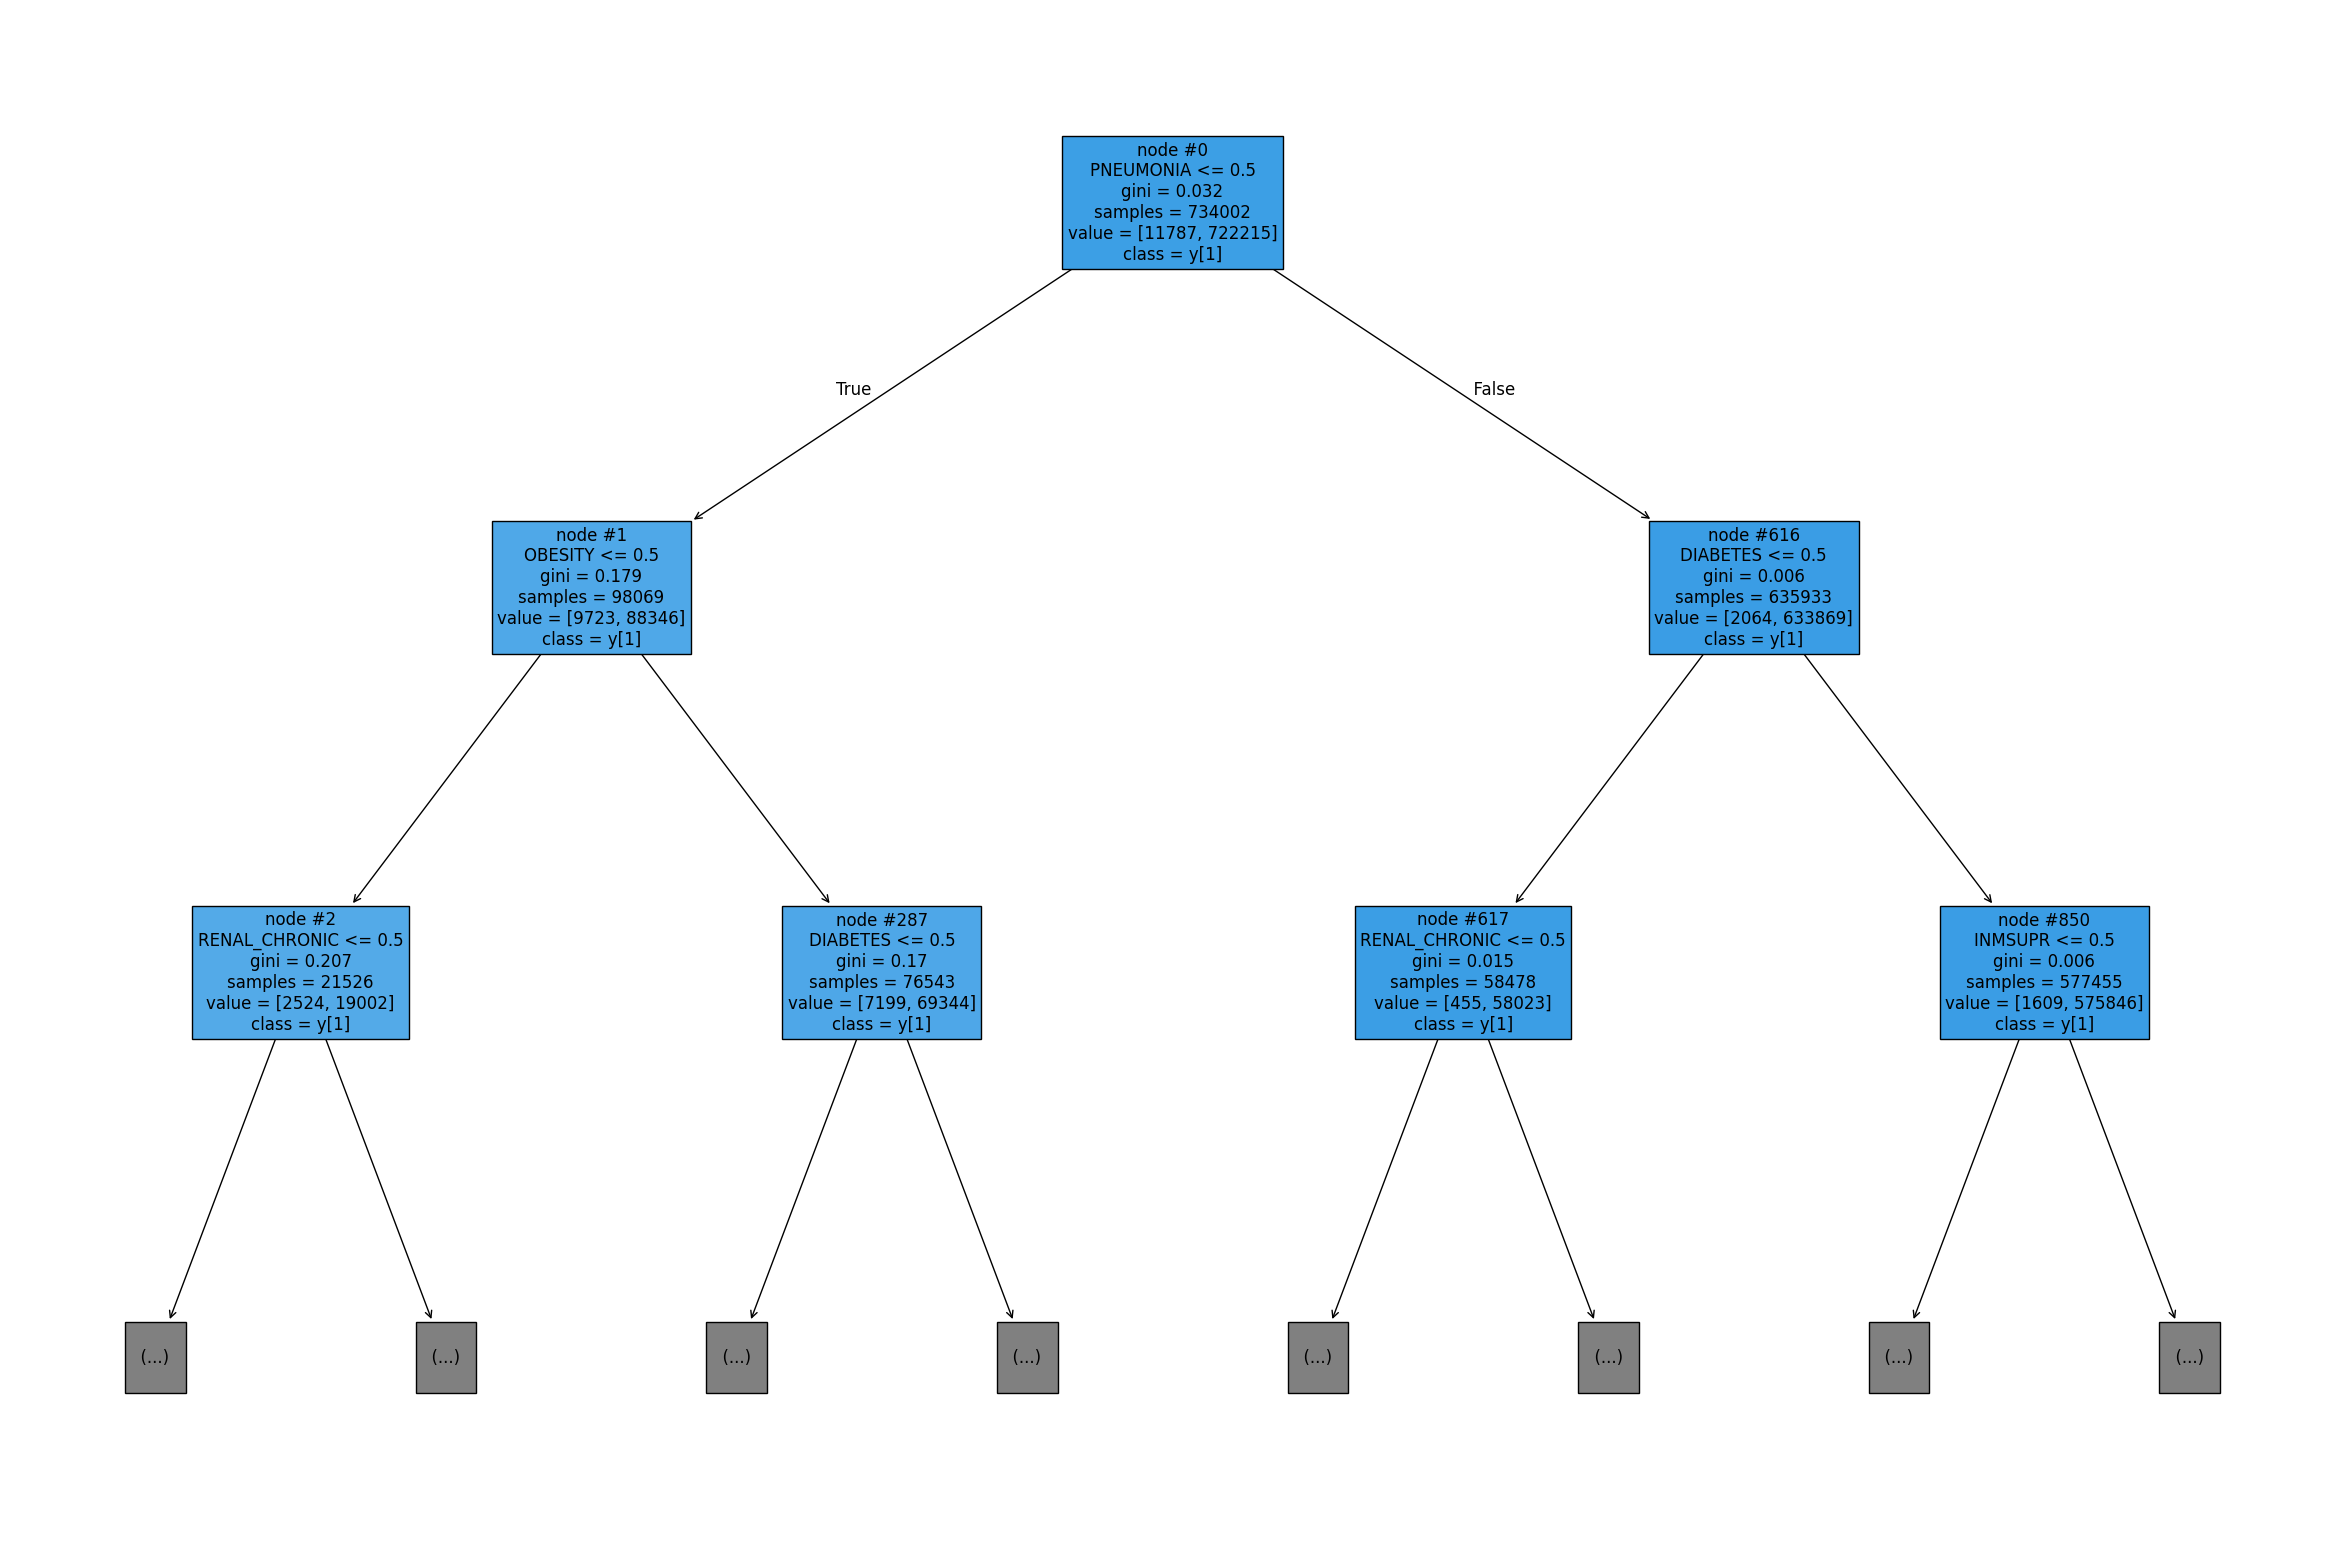

In [95]:
features = list(X.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt, max_depth = 2, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

[Text(0.512255859375, 0.9545454545454546, 'node #0\nPNEUMONIA <= 0.5\ngini = 0.032\nsamples = 734002\nvalue = [11787, 722215]\nclass = y[1]'),
 Text(0.257158203125, 0.8636363636363636, 'node #1\nOBESITY <= 0.5\ngini = 0.179\nsamples = 98069\nvalue = [9723, 88346]\nclass = y[1]'),
 Text(0.38470703124999994, 0.9090909090909092, 'True  '),
 Text(0.09537109375, 0.7727272727272727, 'node #2\nRENAL_CHRONIC <= 0.5\ngini = 0.207\nsamples = 21526\nvalue = [2524, 19002]\nclass = y[1]'),
 Text(0.0294140625, 0.6818181818181818, 'node #3\nCOPD <= 0.5\ngini = 0.173\nsamples = 1085\nvalue = [104.0, 981.0]\nclass = y[1]'),
 Text(0.0115625, 0.5909090909090909, 'node #4\nHIPERTENSION <= 0.5\ngini = 0.124\nsamples = 150\nvalue = [10, 140]\nclass = y[1]'),
 Text(0.0103125, 0.5, 'node #5\nDIABETES <= 0.5\ngini = 0.144\nsamples = 128\nvalue = [10, 118]\nclass = y[1]'),
 Text(0.005625, 0.4090909090909091, 'node #6\nASTHMA <= 0.5\ngini = 0.167\nsamples = 98\nvalue = [9, 89]\nclass = y[1]'),
 Text(0.004375, 0.

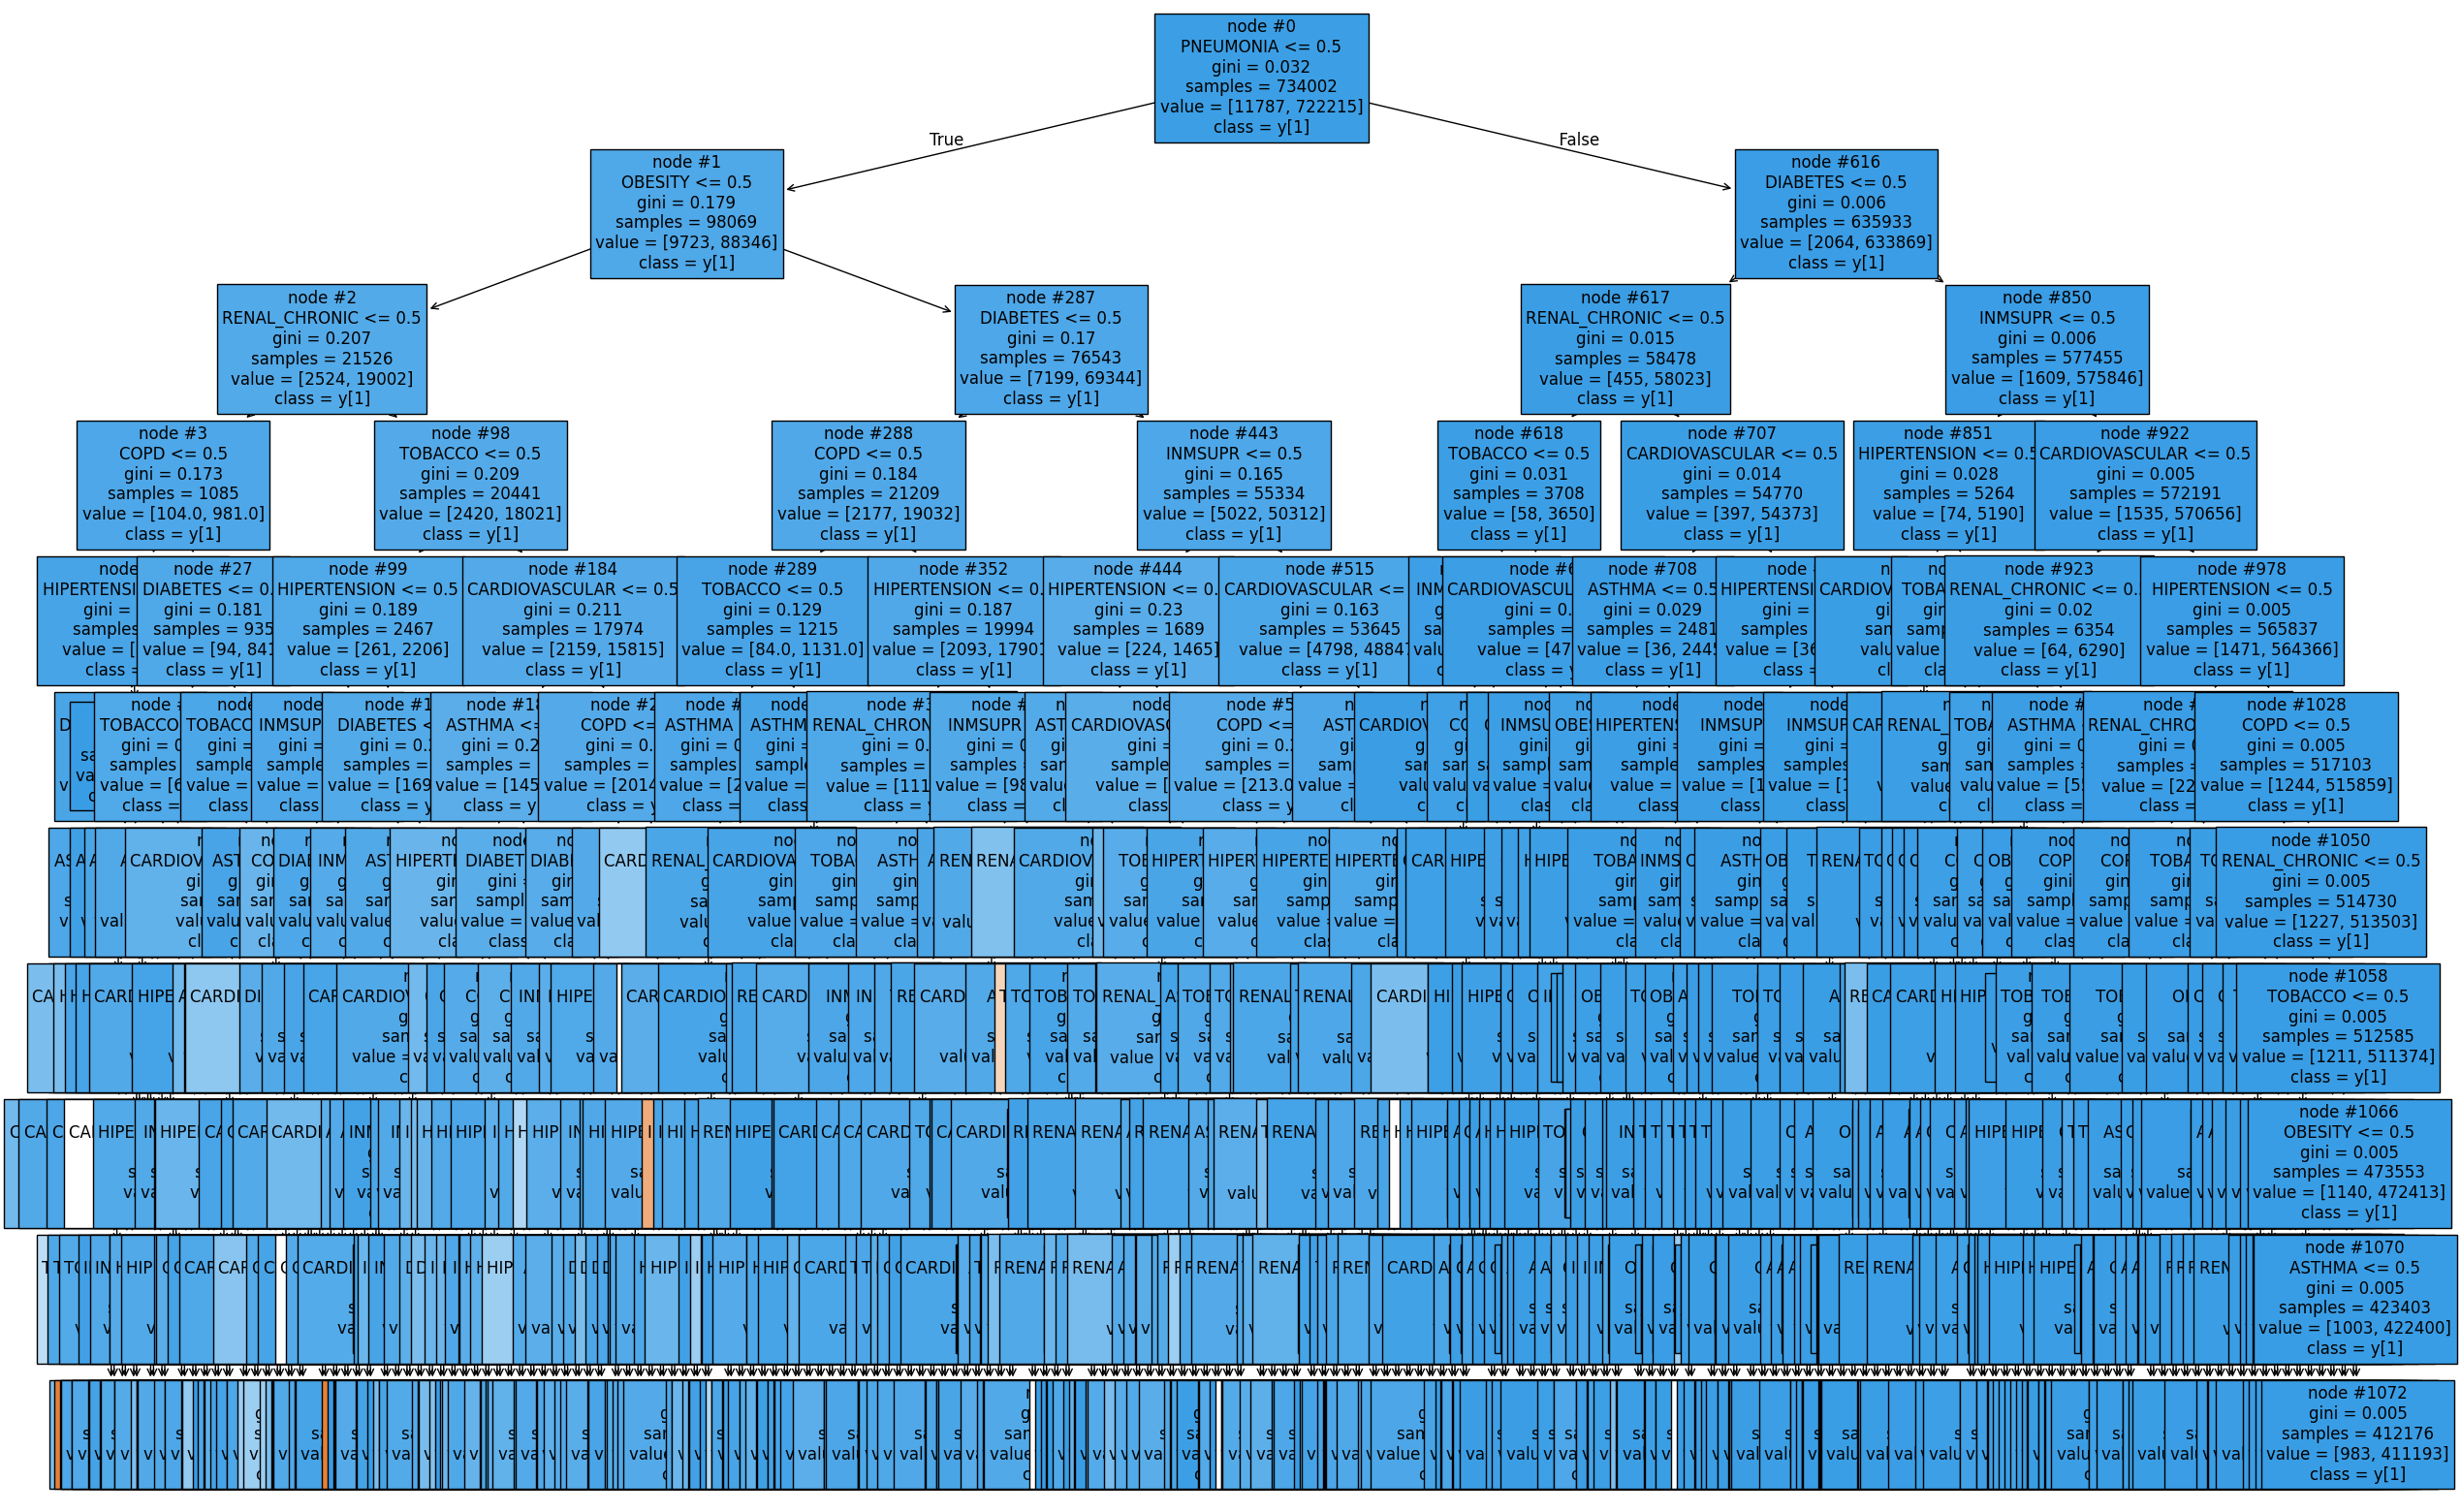

In [96]:
features = list(X.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dt, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

Creación de árboles, uno con un máximo de profundiad y el otro completo para visualizar complejidad

# **Regresión Logística 2, aplicada a variable a predecir "INTUBED"**

Se aplicó misma lógica y pasos que en regresión logística 1, por lo que la explicación es la misma, solo varía la variable a predecir y que en este caso es "INTUBED", cuyo atributo hace referencia a si el paciente debió ser intubado o no a causa del contagio COVID-19.

In [97]:
X =mydata[["PNEUMONIA", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO"]]
y = mydata["INTUBED"]

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Eliminar filas con al menos un valor faltante y restablecer índices
mydata = mydata.dropna().reset_index(drop=True)

# Verificar si quedan valores faltantes
print(mydata.isnull().sum())

# Separar en X e y
X = mydata[["PNEUMONIA", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO"]]
y = mydata["INTUBED"]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelo de regresión logística
model = LogisticRegression(solver='sag')
model.fit(X_scaled, y)

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


LogisticRegression(solver='sag')

In [101]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
log_model = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
log_model.fit(X_train, y_train)

LogisticRegression()

In [102]:
df = pd.DataFrame(mydata)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,0,1,0,65,1,1,1,1,0,2,1,1,1,1,3,1
1,2,1,2,1,0,1,0,72,1,1,1,1,0,2,1,0,0,1,5,1
2,2,1,2,2,0,0,1,55,0,1,1,1,1,2,1,1,1,1,3,1
3,2,1,1,1,0,1,1,53,1,1,1,1,1,2,1,1,1,1,7,1
4,2,1,2,1,0,1,1,68,0,1,1,1,0,2,1,1,1,1,3,1


In [103]:
coefficients = pd.DataFrame(log_model.coef_.T, index=X.columns, columns=[f'Clase {i+1}' for i in range(log_model.coef_.shape[0])])
print(coefficients)

                 Clase 1
PNEUMONIA       1.038482
DIABETES        0.116268
COPD            0.011485
ASTHMA         -0.053497
INMSUPR         0.025776
HIPERTENSION    0.151874
CARDIOVASCULAR  0.017876
OBESITY         0.051307
RENAL_CHRONIC   0.021172
TOBACCO         0.006634


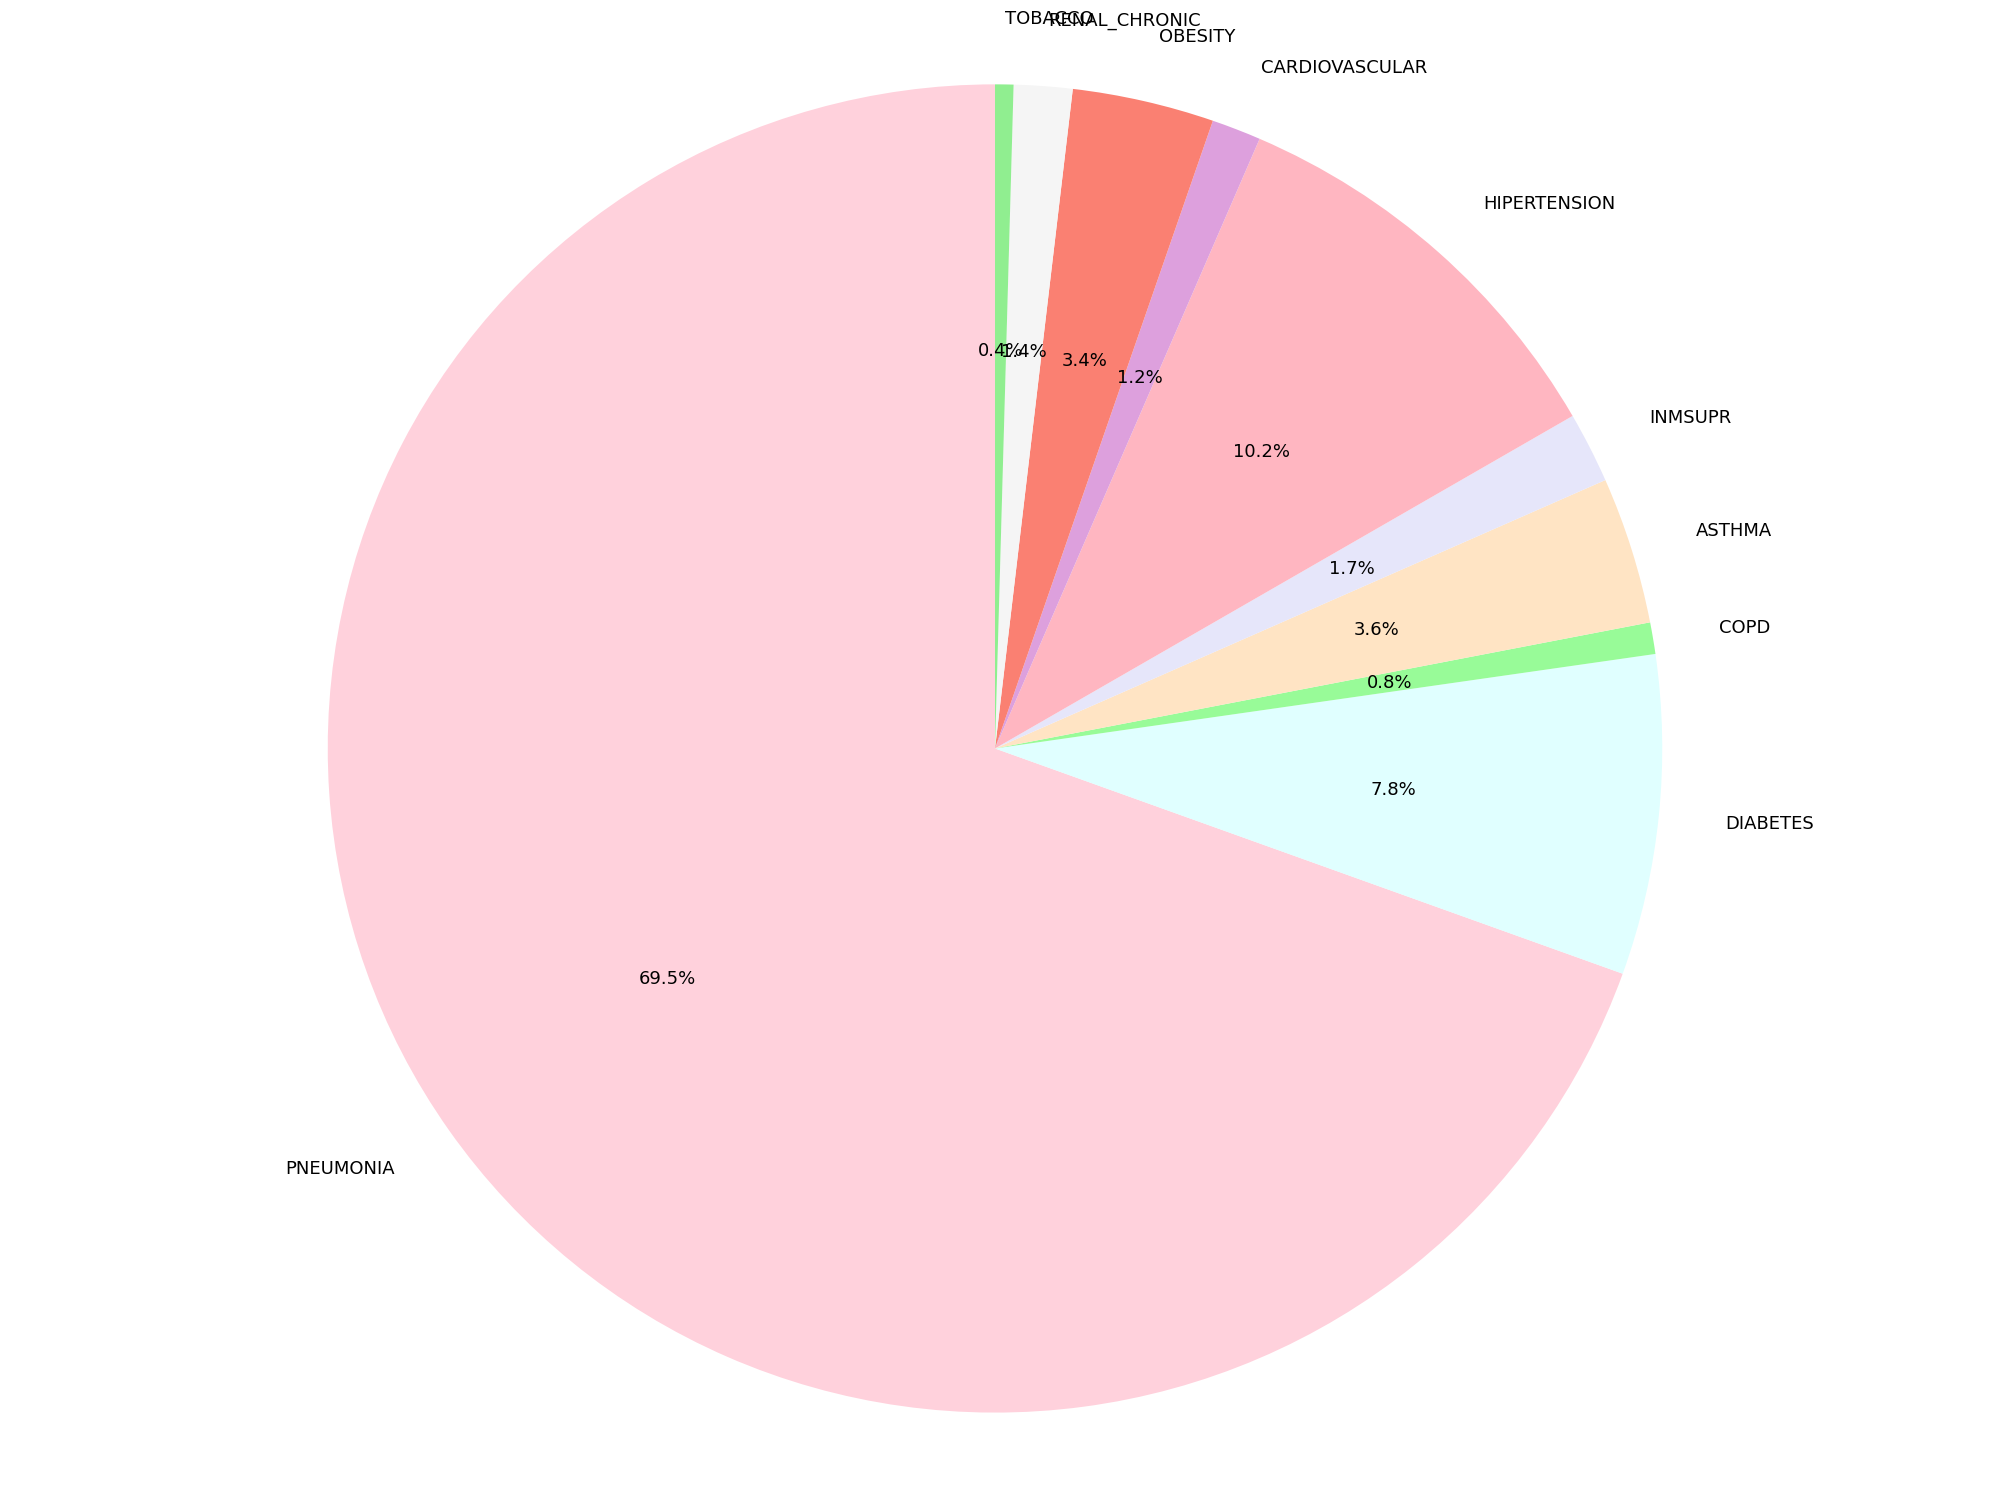

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

coefficients = pd.DataFrame(log_model.coef_.T, index=X.columns, columns=[f'Clase {i+1}' for i in range(log_model.coef_.shape[0])])

plt.figure(figsize=(20, 15))

colors = ['#FFD1DC', '#E0FFFF', '#98FB98', '#FFE4C4', '#E6E6FA', '#FFB6C1', '#DDA0DD', '#FA8072', '#F5F5F5', '#90EE90']

plt.pie(abs(coefficients['Clase 1']), labels=coefficients.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 13})
plt.axis('equal')
plt.tight_layout()
plt.show()

In [105]:
# Predicciones en el conjunto de prueba
y_pred = log_model.predict(X_test)

# Crear el DataFrame con los valores reales (y_test) y predichos (y_pred)
comparison_df = pd.DataFrame({
    'Valor Real (y_test)': y_test,
    'Predicción (y_pred)': y_pred
})

# Añadir una columna que indique si la predicción fue correcta
comparison_df['Es Correcto'] = comparison_df['Valor Real (y_test)'] == comparison_df['Predicción (y_pred)']

# Mostrar las primeras filas del DataFrame
comparison_df.head(100)

,Valor Real (y_test),Predicción (y_pred),Es Correcto
781974,1,1,True
937737,1,1,True
907828,1,1,True
784628,1,1,True
662460,1,1,True
...,...,...,...
230393,1,1,True
444826,1,1,True
275014,1,1,True
100812,1,1,True


In [106]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE para sobremuestrear la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Crear y entrenar el modelo de regresión logística con los datos remuestreados
log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = log_model.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusión:\n{conf_matrix}')

Matriz de Confusión:
[[  7942   2116]
 [ 36817 267698]]


In [107]:
# Contar la cantidad de predicciones correctas e incorrectas
conteo_resultados = comparison_df['Es Correcto'].value_counts()

# Mostrar el resultado
print(conteo_resultados)

Es Correcto
True     304515
False     10058
Name: count, dtype: int64


In [108]:
import numpy as np
import pandas as pd

num_predictions = 5
X_new = pd.DataFrame({
    'PNEUMONIA': np.random.randint(0, 2, num_predictions),
    'DIABETES': np.random.randint(0, 2, num_predictions),
    'COPD': np.random.randint(0, 2, num_predictions),
    'ASTHMA': np.random.randint(0, 2, num_predictions),
    'INMSUPR': np.random.randint(0, 2, num_predictions),
    'HIPERTENSION': np.random.randint(0, 2, num_predictions),
    'CARDIOVASCULAR': np.random.randint(0, 2, num_predictions),
    'OBESITY': np.random.randint(0, 2, num_predictions),
    'RENAL_CHRONIC': np.random.randint(0, 2, num_predictions),
    'TOBACCO': np.random.randint(0, 2, num_predictions)
})


predictions = log_model.predict(X_new)

probabilities = log_model.predict_proba(X_new)

print("Predictions:", predictions)
print("Probabilities:", probabilities)

Predictions: [0 1 0 0 1]
Probabilities: [[0.63713669 0.36286331]
 [0.33656458 0.66343542]
 [0.90339627 0.09660373]
 [0.6647533  0.3352467 ]
 [0.45478893 0.54521107]]


In [109]:
import seaborn as sns
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [110]:
from sklearn.metrics import accuracy_score

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

Exactitud: 0.8762354048185954


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

Accuracy: 0.8762354048185954
Precision: 0.9921575603934563
Recall: 0.8790962678357388
F1-score: 0.9322113283501269


AUC-ROC: 0.8753511809721437


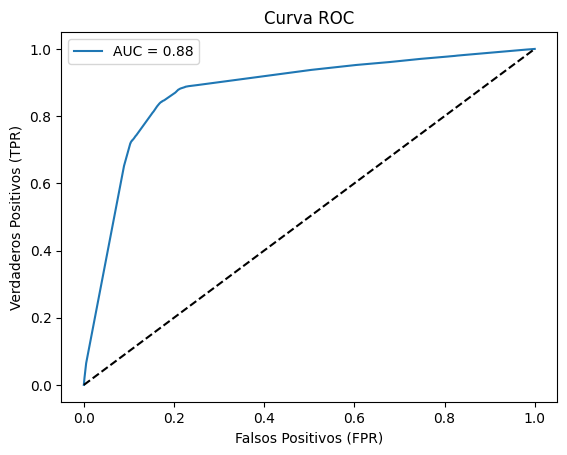

In [112]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular la probabilidad de la clase positiva
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Calcular el AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc}')

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia (modelo aleatorio)
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

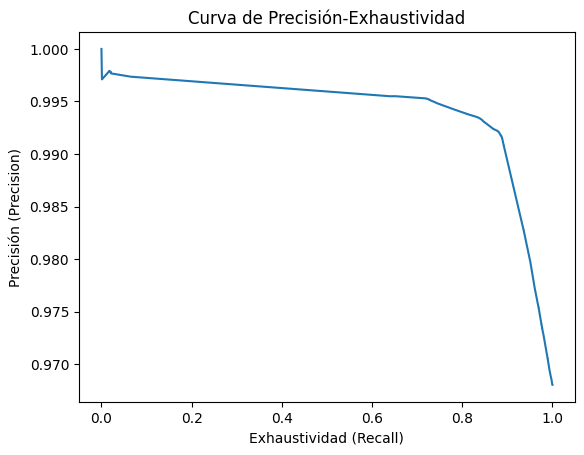

In [113]:
from sklearn.metrics import precision_recall_curve

# Calcular los valores de precisión y exhaustividad para varios umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Graficar la curva de precisión-exhaustividad
plt.plot(recall, precision)
plt.xlabel('Exhaustividad (Recall)')
plt.ylabel('Precisión (Precision)')
plt.title('Curva de Precisión-Exhaustividad')
plt.show()

**Regresión logística 2:** A partir de los coeficientes, se obtiene que La comorbilidad o variable predictora que tiene mayor influencia en si el paciente es intubado o no, es  “PNEUMONÍA”, mientras que la que tiene menor incidencia en esta variables es “ASHTMA”, por lo que si el paciente COVID-19 es asmático o no, no tiene mayor incidencia en la severidad de su diagnóstico, por otra parte, patologías como “HIPERTENSION” y “DIABETES” también tienen una influencia considerable.

En cuanto a la precisión del modelo, se tiene lo siguiente:
- Acurracy (exactitud) indica el porcentaje de predicciones correctas del modelo sobre el total de predicciones realizadas, con un valor de 87,6%, indicando que predice de forma correcta la clase en app el 87,6% de las veces.
- Precisión del modelo, el valor de 99,2% indica que cuando el modelo predice la clase positiva, tiene una alta probabilidad de estar en lo correcto.
- Recall (exhaustividad o sensibilidad) hace referencia a que el modelo identifica correctamente alrededor del 87,9% de los casos positivos reales.
- F1-score (puntaje F1) proporciona un balance entre precisión y recall, un puntaje de F1 alto como 0,932 indica un buen rendimiento general del modelo, considerando su capacidad de identificar correctamente casos positivos así como también, su capacidad de evitar falsos positivos.

Finalmente,  la curva ROC, cuya utilidad es la misma ya mencionada en la predicción 1, el valor AUC-ROC, 0.875351…  0.88 resume el rendimiento general del modelo, en donde valores cercanos a 1 indican un buen modelo, mientras que menor a 0.5 indica un modelo sin poder predictivo. En este caso, significa que en promedio, el modelo es capaz de distinguir correctamente entre las dos clases (positiva, paciente de alto riesgo y negativa en caso contrario) en un 88% de los casos. En la curva de precisión - exahustividad, se espera que se acerque lo más posible a la esquina superior derecha del gráfico, lo cual significa alta precisión y alta exhaustividad, características que cumple la curva obtenida.


# **Árbol de decisión 2, aplicado a variable a predecir "INTUBED"**

Se aplicó misma lógica y pasos que en árbol de desición 1, por lo que la explicación es la misma que árbol de decisión 1.


In [114]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [115]:
dt = DecisionTreeClassifier(random_state = 1)

In [116]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.18      0.79      0.29     10058
           1       0.99      0.88      0.93    304515

    accuracy                           0.88    314573
   macro avg       0.58      0.83      0.61    314573
weighted avg       0.97      0.88      0.91    314573



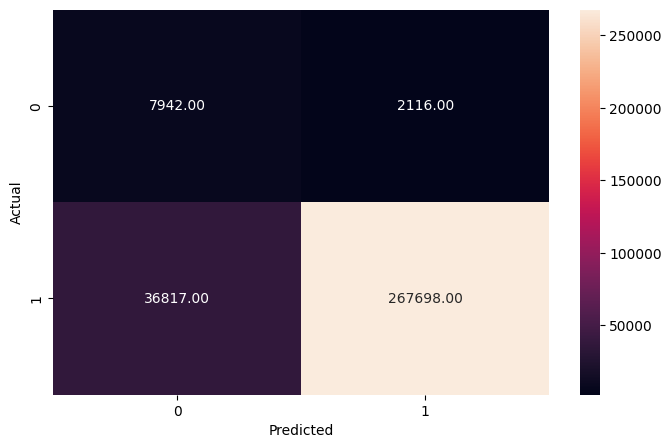

Accuracy: 0.8762354048185954


In [117]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    accuracy = accuracy_score(actual, predicted)
    print(f'Accuracy: {accuracy}')

metrics_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.16      0.00      0.00     10058
           1       0.97      1.00      0.98    304515

    accuracy                           0.97    314573
   macro avg       0.56      0.50      0.49    314573
weighted avg       0.94      0.97      0.95    314573



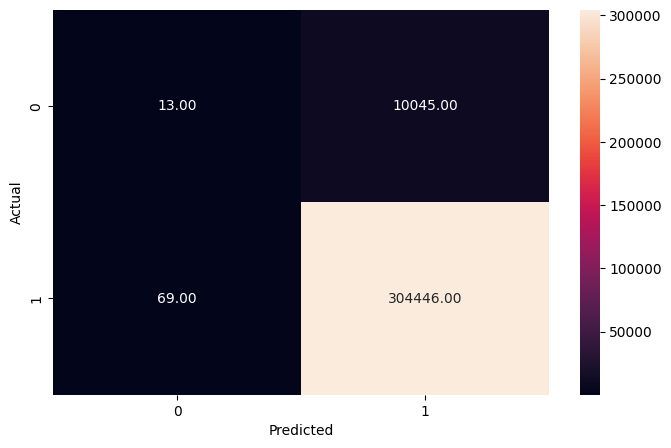

Accuracy: 0.967848480320943


In [118]:
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

In [119]:
y_test_df = pd.DataFrame(y_test_pred_dt)
y_test_df.value_counts()

,count
0,
1,314491
0,82


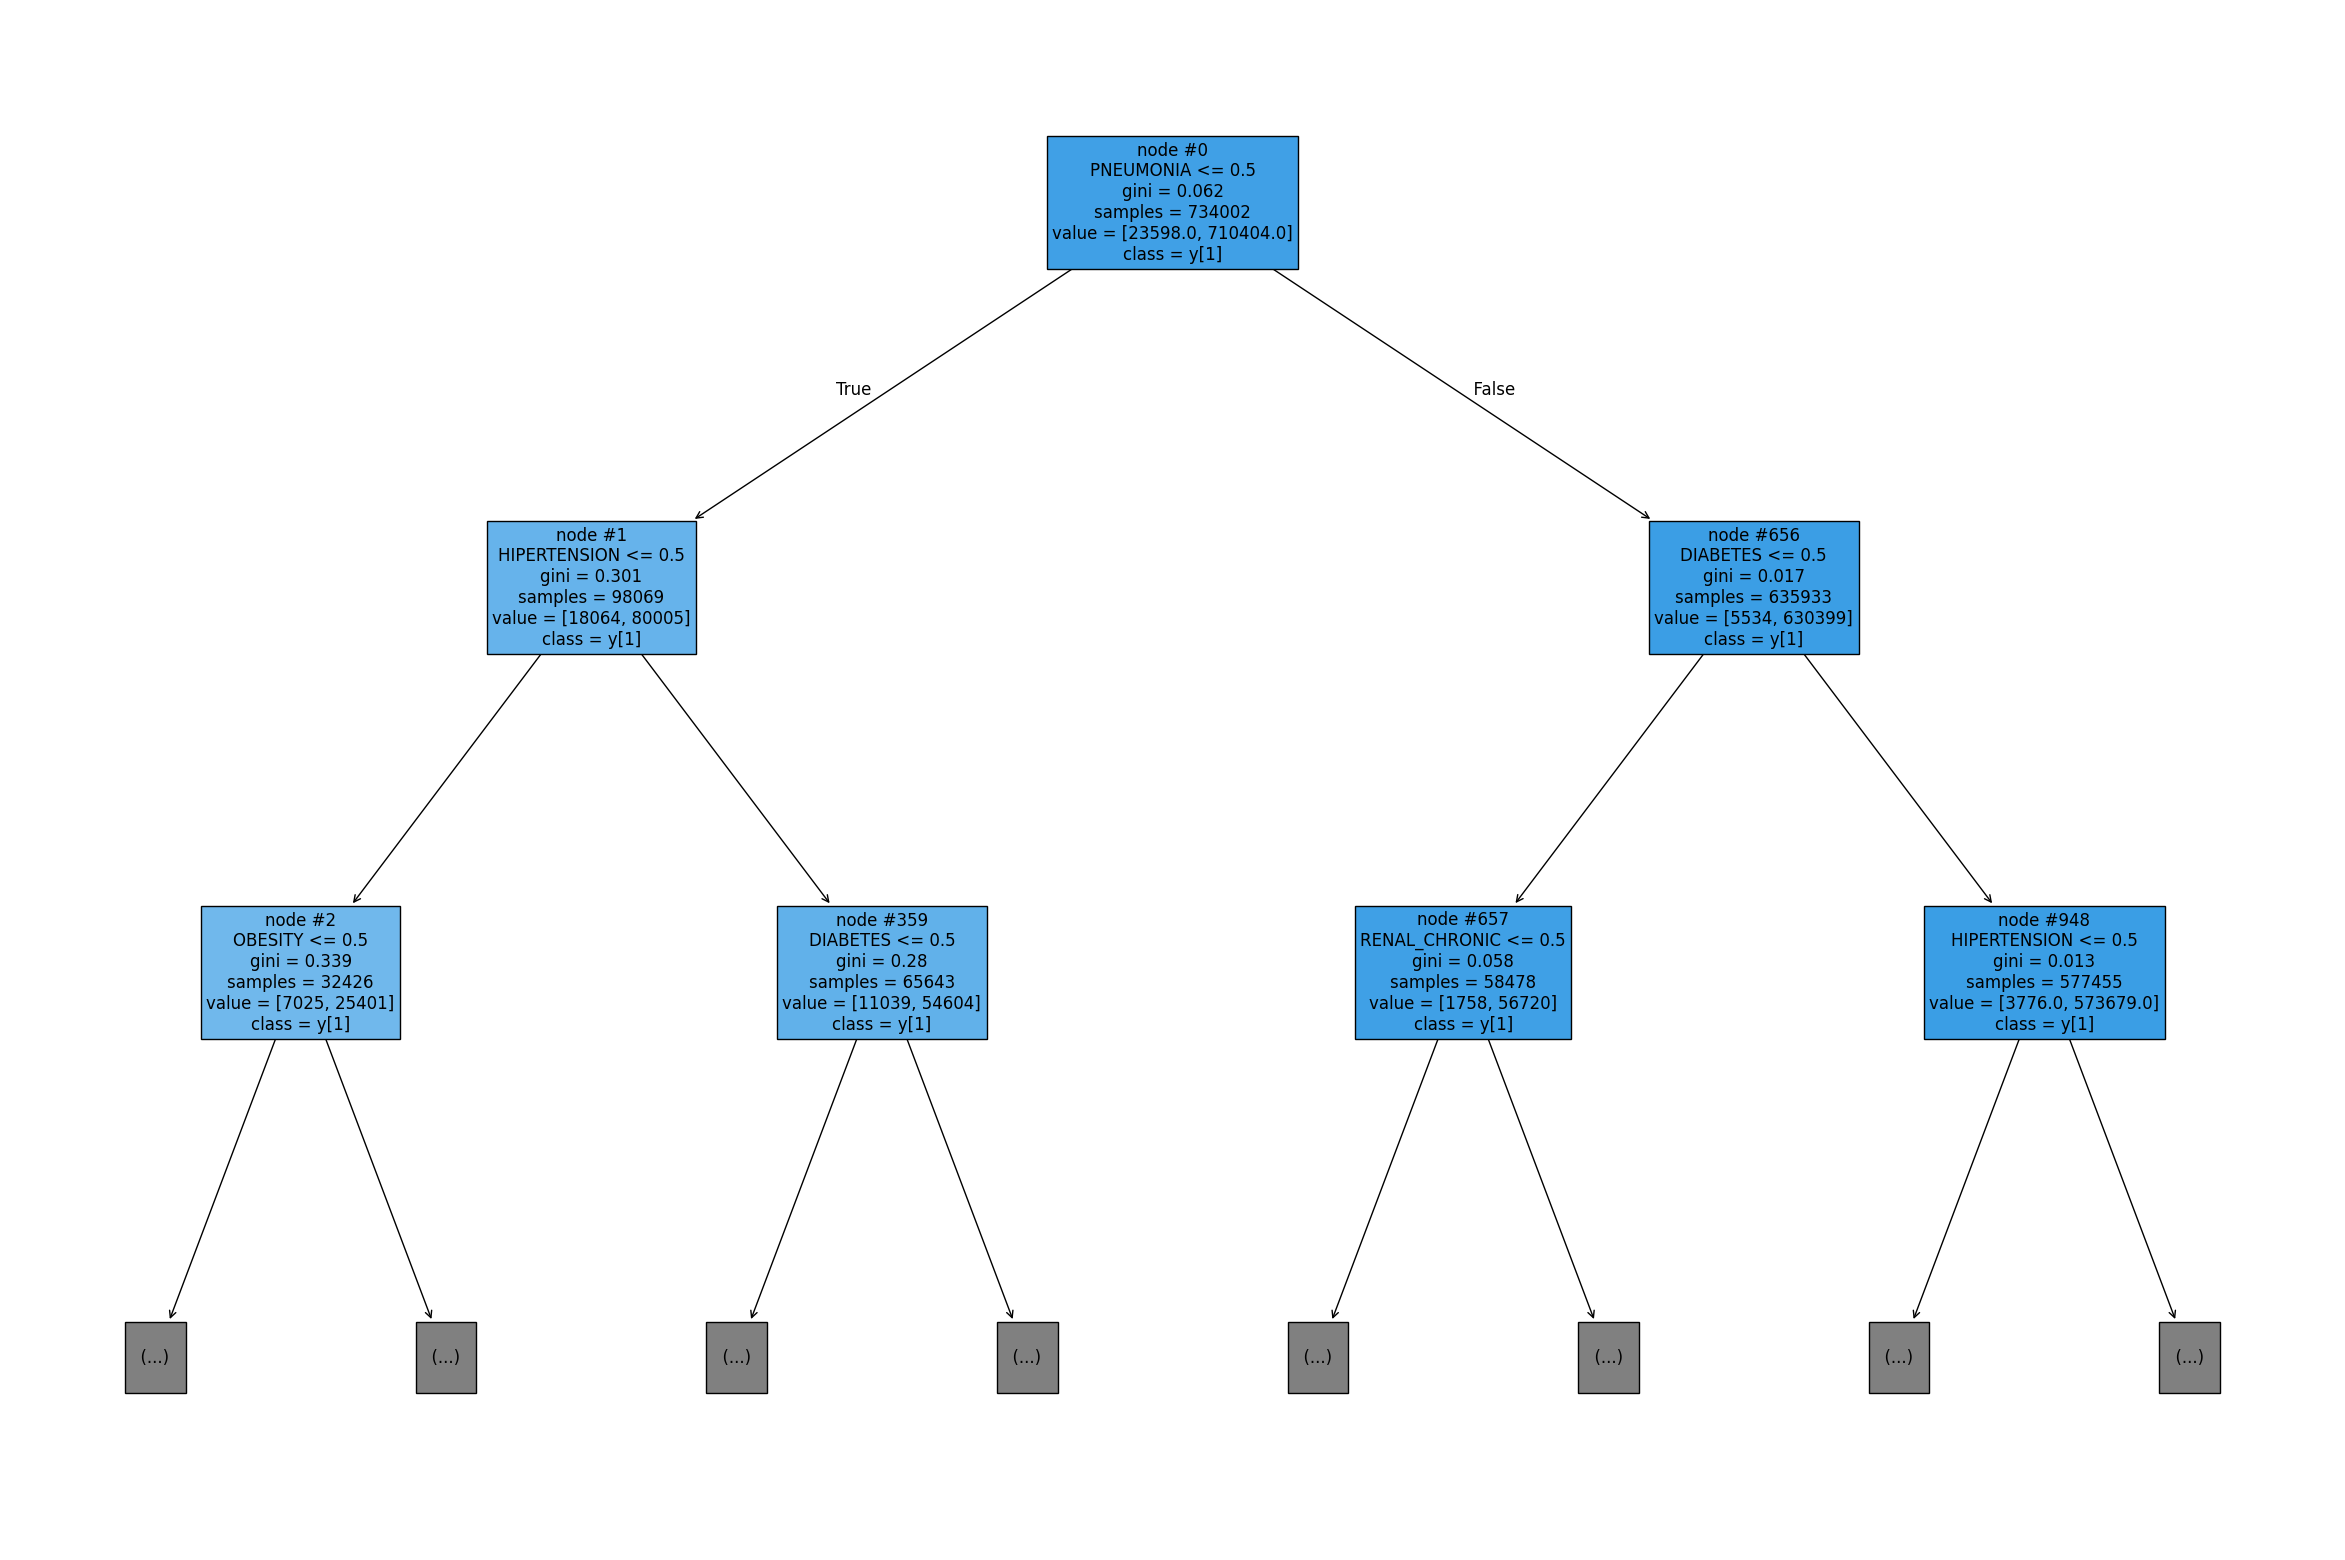

In [120]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 2, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

# **Regresión logística 3, aplicado a variable a predecir "PATIENT_TYPE"**

Se aplicó misma lógica y pasos que en regresión logística 1 y 2, por lo que la explicación es la misma, solo varía la variable a predecir y que en este caso es "PATIENT_TYPE", que hace referencia a si el paciente con coronavirus fue hospitalizado o enviado a casa.

In [122]:
X =mydata[["PNEUMONIA", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO"]]
y = mydata["PATIENT_TYPE"]

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Eliminar filas con al menos un valor faltante y restablecer índices
mydata = mydata.dropna().reset_index(drop=True)

# Verificar si quedan valores faltantes
print(mydata.isnull().sum())

# Separar en X e y
X = mydata[["PNEUMONIA", "DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO"]]
y = mydata["PATIENT_TYPE"]

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Modelo de regresión logística
model = LogisticRegression(solver='sag')
model.fit(X_scaled, y)

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


LogisticRegression(solver='sag')

In [126]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
log_model = LogisticRegression()

# Ajustar el modelo a los datos de entrenamiento
log_model.fit(X_train, y_train)

LogisticRegression()

In [127]:
df = pd.DataFrame(mydata)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,0,1,0,65,1,1,1,1,0,2,1,1,1,1,3,1
1,2,1,2,1,0,1,0,72,1,1,1,1,0,2,1,0,0,1,5,1
2,2,1,2,2,0,0,1,55,0,1,1,1,1,2,1,1,1,1,3,1
3,2,1,1,1,0,1,1,53,1,1,1,1,1,2,1,1,1,1,7,1
4,2,1,2,1,0,1,1,68,0,1,1,1,0,2,1,1,1,1,3,1


In [128]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE para sobremuestrear la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Crear y entrenar el modelo de regresión logística con los datos remuestreados
log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = log_model.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusión:\n{conf_matrix}')

Matriz de Confusión:
[[234215  20670]
 [ 18916  40772]]


In [129]:
coefficients = pd.DataFrame(log_model.coef_.T, index=X.columns, columns=[f'Clase {i+1}' for i in range(log_model.coef_.shape[0])])
print(coefficients)

                 Clase 1
PNEUMONIA      -3.806219
DIABETES       -0.931471
COPD           -1.256782
ASTHMA          0.100335
INMSUPR        -1.291894
HIPERTENSION   -0.683086
CARDIOVASCULAR -0.640443
OBESITY         0.050438
RENAL_CHRONIC  -1.236784
TOBACCO         0.172353


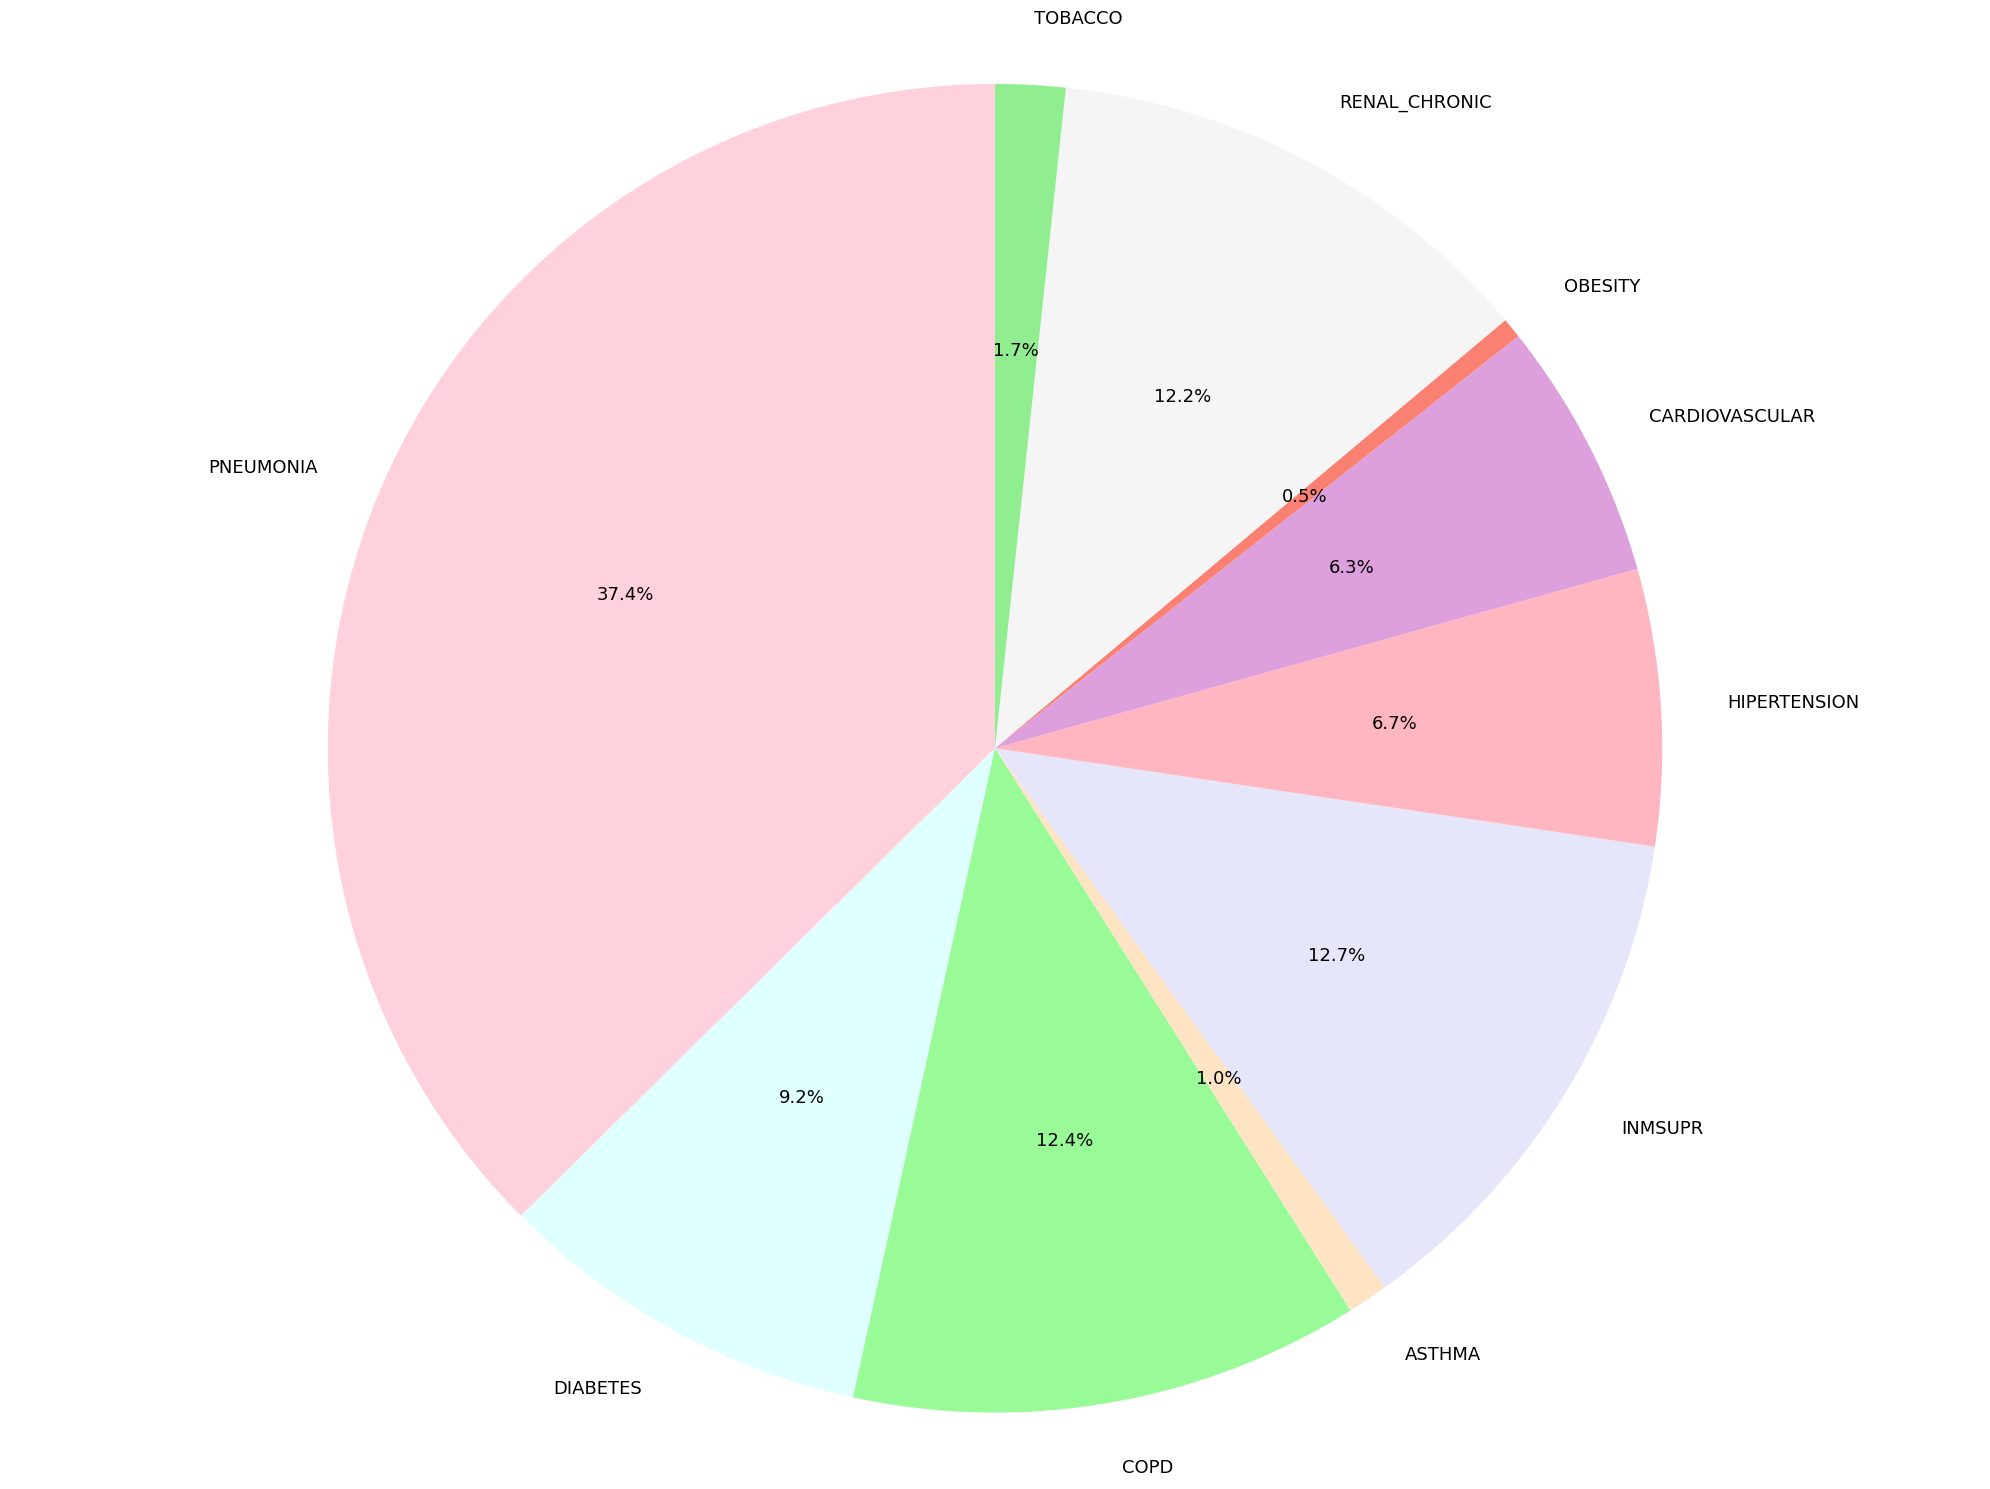

In [130]:
import matplotlib.pyplot as plt
import pandas as pd

coefficients = pd.DataFrame(log_model.coef_.T, index=X.columns, columns=[f'Clase {i+1}' for i in range(log_model.coef_.shape[0])])

plt.figure(figsize=(20, 15))

colors = ['#FFD1DC', '#E0FFFF', '#98FB98', '#FFE4C4', '#E6E6FA', '#FFB6C1', '#DDA0DD', '#FA8072', '#F5F5F5', '#90EE90']

plt.pie(abs(coefficients['Clase 1']), labels=coefficients.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 13})
plt.axis('equal')
plt.tight_layout()
plt.show()

In [131]:
# Predicciones en el conjunto de prueba
y_pred = log_model.predict(X_test)

# Crear el DataFrame con los valores reales (y_test) y predichos (y_pred)
comparison_df = pd.DataFrame({
    'Valor Real (y_test)': y_test,
    'Predicción (y_pred)': y_pred
})

# Añadir una columna que indique si la predicción fue correcta
comparison_df['Es Correcto'] = comparison_df['Valor Real (y_test)'] == comparison_df['Predicción (y_pred)']

# Mostrar las primeras filas del DataFrame
comparison_df.head(100)

,Valor Real (y_test),Predicción (y_pred),Es Correcto
781974,1,1,True
937737,1,1,True
907828,1,1,True
784628,1,1,True
662460,1,1,True
...,...,...,...
230393,1,1,True
444826,2,2,True
275014,1,1,True
100812,1,1,True


In [132]:
# Contar la cantidad de predicciones correctas e incorrectas
conteo_resultados = comparison_df['Es Correcto'].value_counts()

# Mostrar el resultado
print(conteo_resultados)

Es Correcto
True     274987
False     39586
Name: count, dtype: int64


In [133]:
import numpy as np
import pandas as pd

num_predictions = 5
X_new = pd.DataFrame({
    'PNEUMONIA': np.random.randint(0, 2, num_predictions),
    'DIABETES': np.random.randint(0, 2, num_predictions),
    'COPD': np.random.randint(0, 2, num_predictions),
    'ASTHMA': np.random.randint(0, 2, num_predictions),
    'INMSUPR': np.random.randint(0, 2, num_predictions),
    'HIPERTENSION': np.random.randint(0, 2, num_predictions),
    'CARDIOVASCULAR': np.random.randint(0, 2, num_predictions),
    'OBESITY': np.random.randint(0, 2, num_predictions),
    'RENAL_CHRONIC': np.random.randint(0, 2, num_predictions),
    'TOBACCO': np.random.randint(0, 2, num_predictions)
})

predictions = log_model.predict(X_new)

probabilities = log_model.predict_proba(X_new)

print("Predictions:", predictions)
print("Probabilities:", probabilities)

Predictions: [2 2 2 2 2]
Probabilities: [[0.00205289 0.99794711]
 [0.00924123 0.99075877]
 [0.27130617 0.72869383]
 [0.0216655  0.9783345 ]
 [0.0077727  0.9922273 ]]


In [134]:
import seaborn as sns
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [135]:
from sklearn.metrics import accuracy_score

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

Exactitud: 0.8741595750429948


In [136]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

Accuracy: 0.8741595750429948
Precision: 0.9252718947896543
Recall: 0.9189046040371148
F1-score: 0.9220772574092154


AUC-ROC: 0.8402054952645361


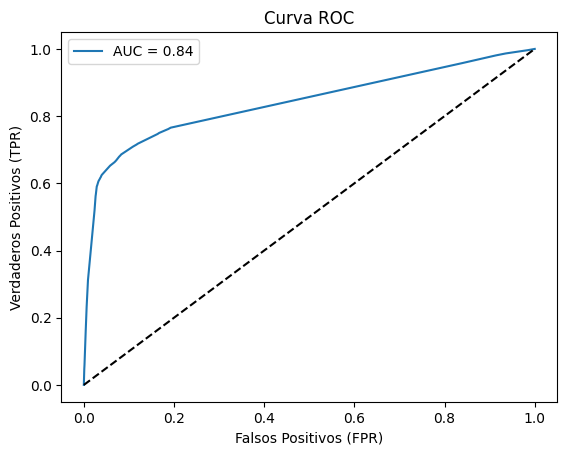

In [137]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular la probabilidad de la clase positiva
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=2)

# Calcular el AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc}')

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

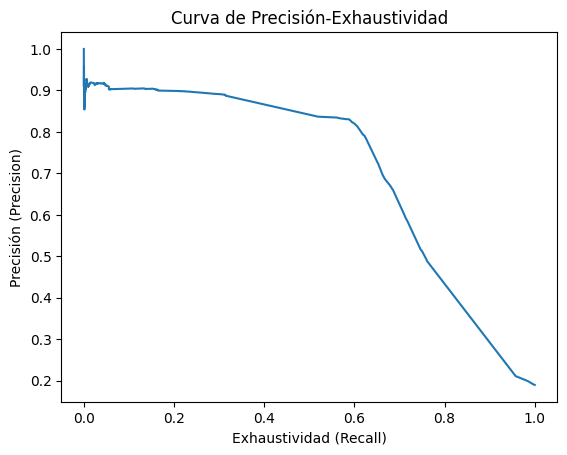

In [138]:
from sklearn.metrics import precision_recall_curve

# Calcular los valores de precisión y exhaustividad para varios umbrales
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba, pos_label=2)

# Graficar la curva de precisión-exhaustividad
plt.plot(recall, precision)
plt.xlabel('Exhaustividad (Recall)')
plt.ylabel('Precisión (Precision)')
plt.title('Curva de Precisión-Exhaustividad')
plt.show()

**Regresión logística 3:** Se evidencia coeficiente negativo en varios atributos, lo cual concluye que patologías como neumonía, diabetes, enfermedad pulmonar obstructiva (COPD), inmunosupresión, enfermedades cardiovasculares y renales crónicas no, disminuyen la probabilidad de que un paciente contagiado del virus en cuestión sea hospitalizado. En caso contrario, comorbilidades como asma, obesidad y fumador (tobacco) aumentan esta probabilidad.

Con respecto a la precisión del modelo, se obtuvo:
- Acurracy: del total de predicciones realizadas por el modelo, el 87,4% de estas fueron correctas.
- Precisión: del total de predicciones positivas, clasificando a pacientes como positivos (de alto riesgo), el 92,5% fueron realmente positivos.
- Recall: de los casos realmente positivos, el 91,9% fueron identificados correctamente por el modelo.
- F1 - score = 0,922, este valor indica un buen equilibrio entre precisión y exhaustividad del modelo, mientras más cercano a 1 es el valor, mejor.

Finalmente, el valor AUC - ROC = O,84020…  0,84, indica que el modelo tiene una probabilidad de 84% de poder distinguir entre una instancia positiva elegida al azar y una instancia negativa elegida al azar. La curva ROC como tal, refiere que el modelo está funcionando bien para predecir si el paciente covid es de alto riesgo al padecer alguna comorbilidad, sin embargo, aún existe un margen de mejora, pudiendo mejorar la especificidad del modelo. En este caso, en la curva de precisión - exhaustividad se evidencia que a medida que aumenta la exhaustividad (identificando a más pacientes de alto riesgo que requieren de hospitalización), disminuye la precisión, lo cual se traduce en que al intentar capturar a todos los pacientes que necesitan hospitalización, el modelo también podría clasificar erróneamente a algunos pacientes sanos como necesitados de hospitalización.


# **Árbol de decisión 3, aplicado a variable a predecir "PATIENT_TYPE"**

Se aplicó misma lógica y pasos que en árbol de decisión 1 y 2, por lo que la explicación es la misma que árbol de decisión 1.

In [139]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [140]:
dt = DecisionTreeClassifier(random_state = 1)

In [141]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           1       0.93      0.92      0.92    254885
           2       0.66      0.68      0.67     59688

    accuracy                           0.87    314573
   macro avg       0.79      0.80      0.80    314573
weighted avg       0.88      0.87      0.87    314573



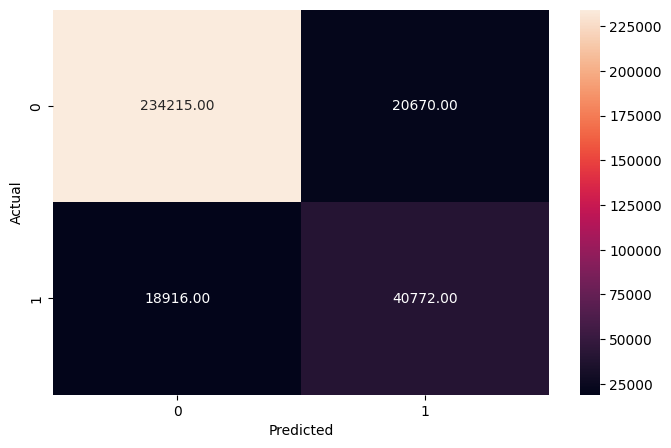

Accuracy: 0.8741595750429948


In [142]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    accuracy = accuracy_score(actual, predicted)
    print(f'Accuracy: {accuracy}')

metrics_score(y_test, y_pred)

              precision    recall  f1-score   support

           1       0.91      0.97      0.94    254885
           2       0.82      0.60      0.69     59688

    accuracy                           0.90    314573
   macro avg       0.87      0.79      0.82    314573
weighted avg       0.89      0.90      0.89    314573



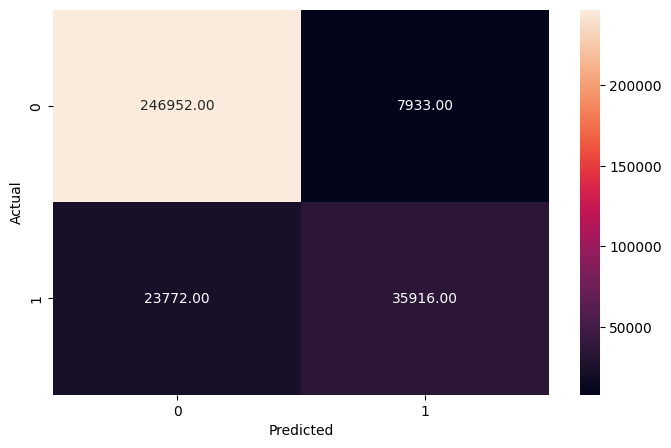

Accuracy: 0.8992125834067132


In [143]:
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

In [144]:
y_test_df = pd.DataFrame(y_test_pred_dt)
y_test_df.value_counts()

,count
0,
1,270724
2,43849


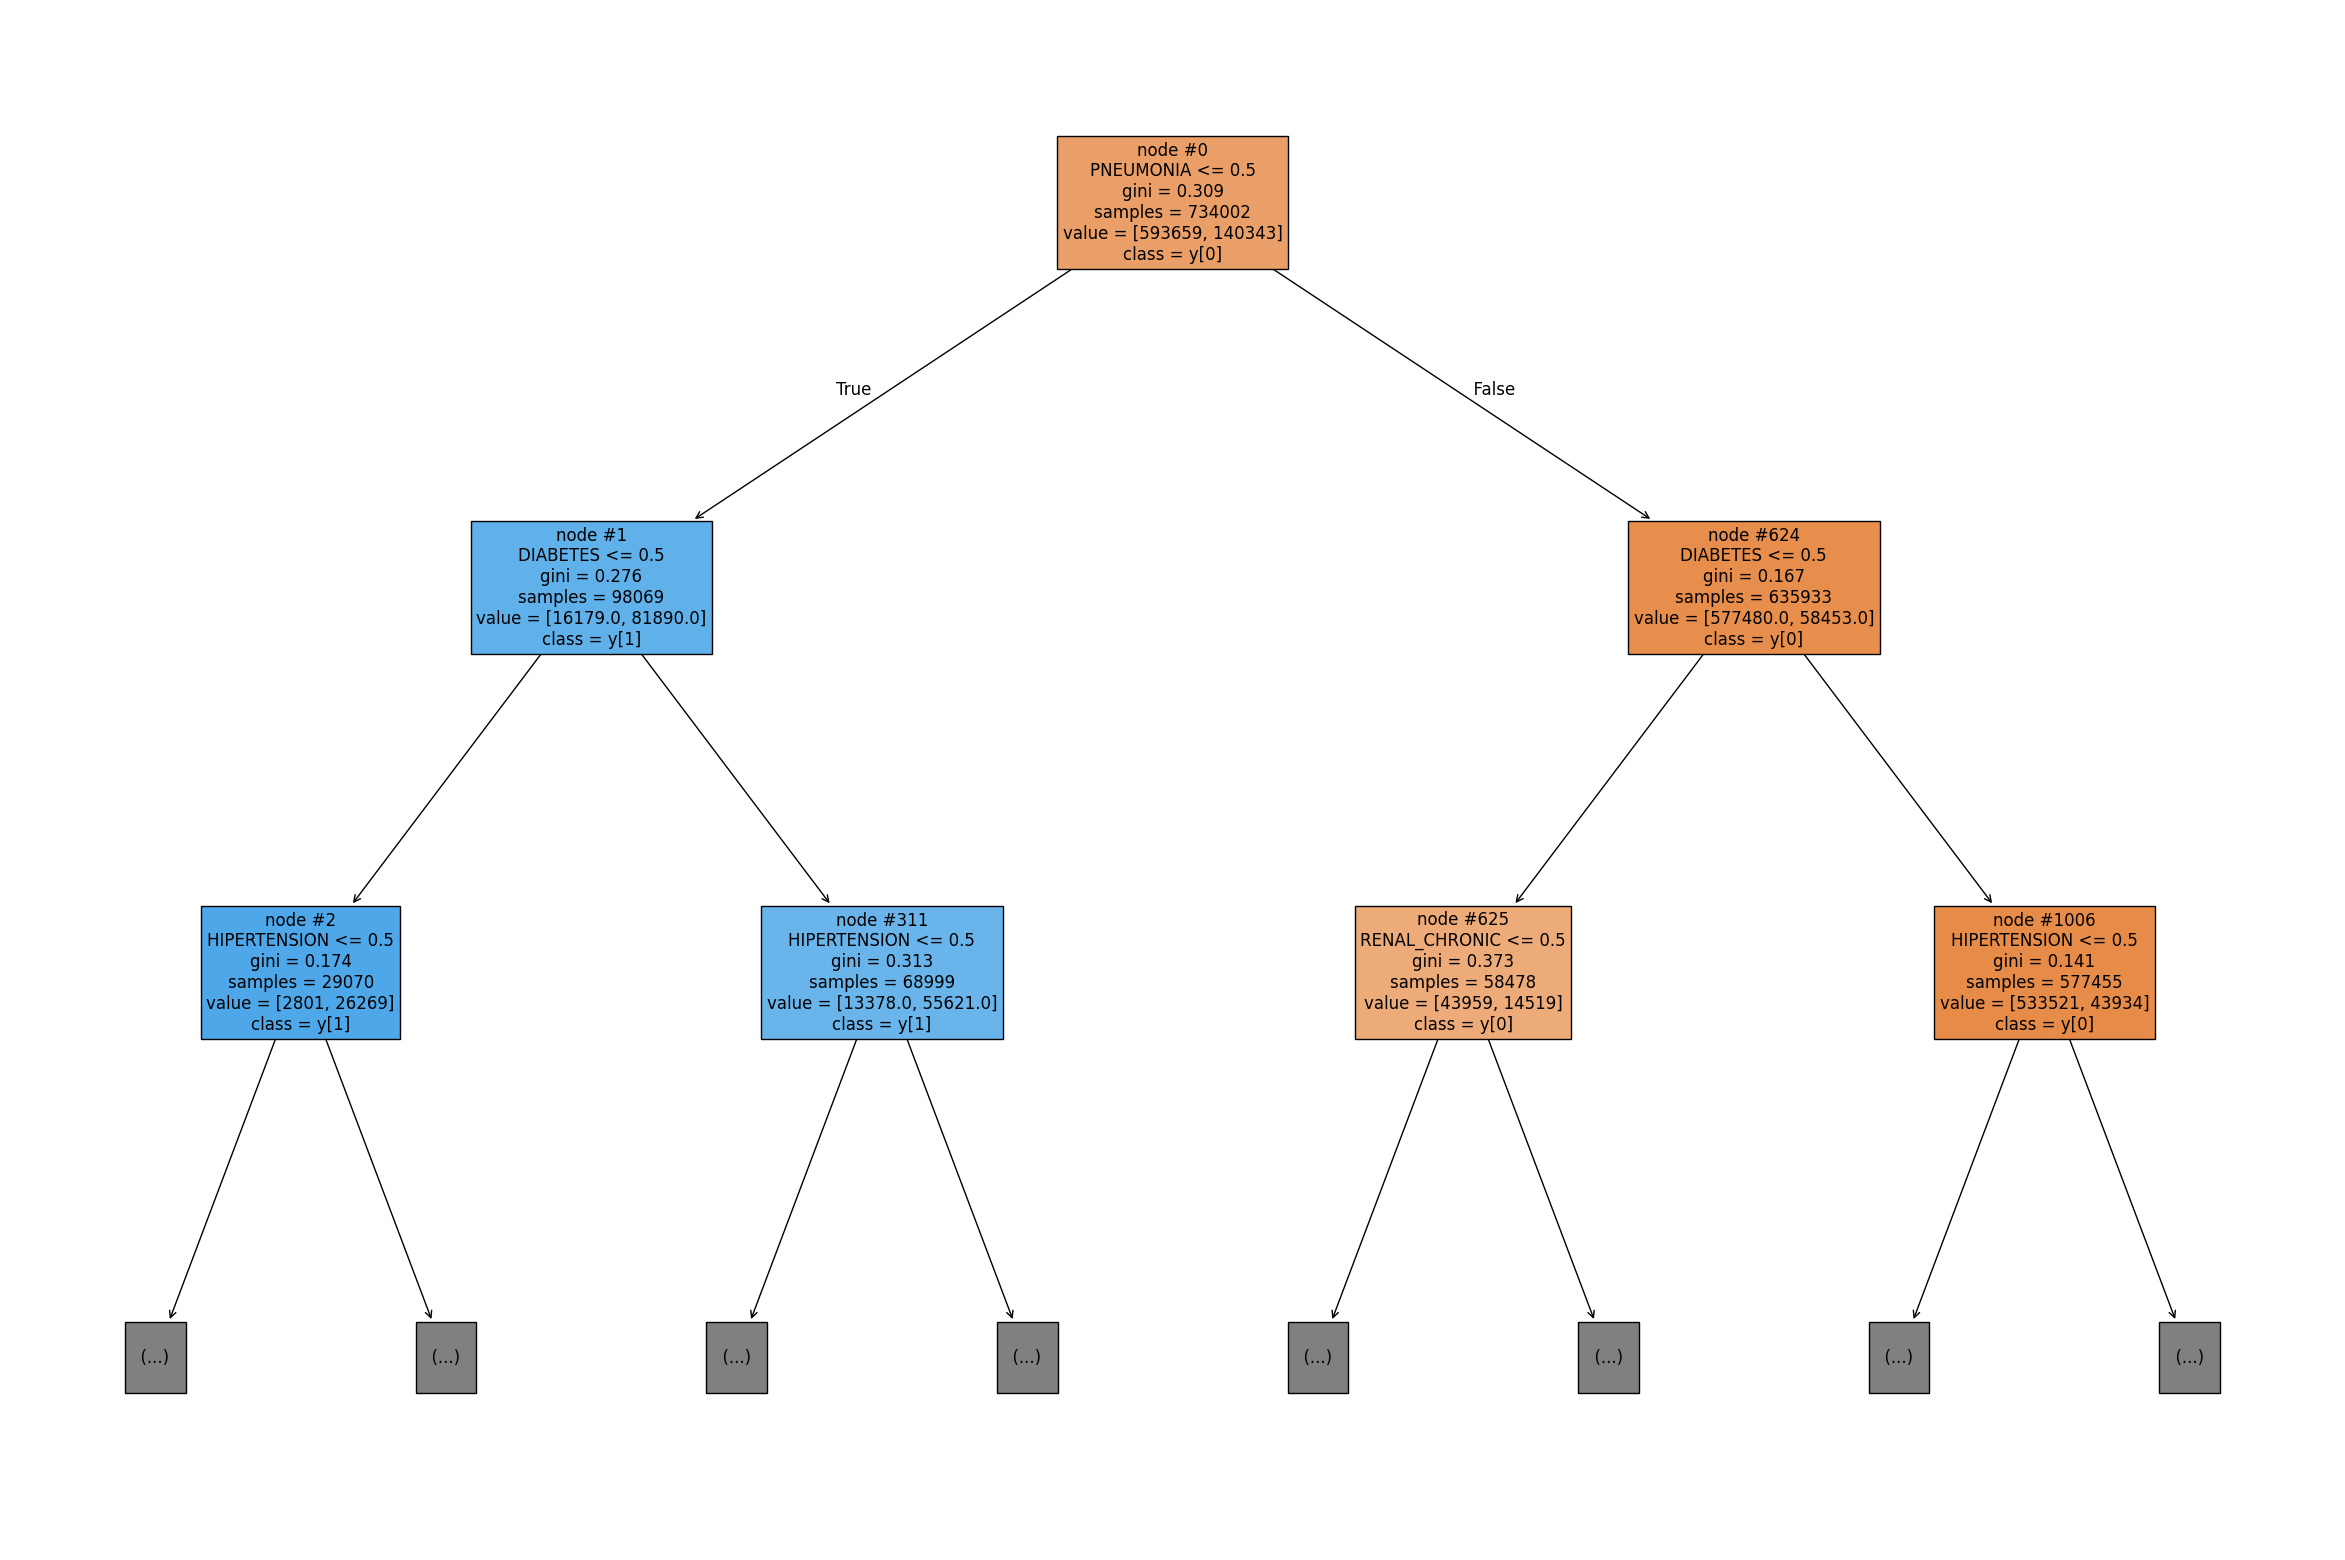

In [145]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 2, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

**CONCLUSIÓN A MODO GENERAL CURVAS ROC**

La curva ROC de las regresiones logísticas realizadas mostraron un AUC promedio de 0.88, lo que refleja un excelente desempeño del modelo para distinguir entre pacientes de alto y bajo riesgo. Este valor indica que el modelo tiene una alta capacidad de sensibilidad y especificidad, logrando identificar correctamente tanto los casos positivos como negativos en la mayoría de las situaciones. Esto refuerza la utilidad del modelo en contextos clínicos, donde es crucial priorizar recursos para los pacientes con mayor probabilidad de desarrollar complicaciones severas.

**Conclusiones generales**

Los resultados obtenidos tras la implementación de algoritmos de data science, como lo son árboles de decisión y regresión logística, permiten concluir que la presencia de ciertas comorbilidades incrementa de manera significativa el riesgo de que un paciente con COVID-19 desarrolle una condición severa que requiera hospitalización, intubación o ingreso a la UCI. A partir de la aplicación de los diferentes algoritmos, se logró identificar que comorbilidades como neumonía, obesidad, hipertensión y diabetes tienen una gran influencia en este diagnóstico. A continuación, se presenta un resumen del impacto de estas variables en función de cada outcome:

Ingreso a la UCI por contagio de COVID-19 → Neumonía y obesidad son las patologías que más influyen en la probabilidad de ingreso a UCI, especialmente la primera mencionada, que aumenta de forma considerable la posibilidad de que un cuadro severo de COVID-19 requiera de cuidados intensivos.

Intubación tras COVID-19 → Se repite la neumonía como patología clave en la predicción de intubación por COVID-19, sin embargo, también influyen factores como hipertensión y diabetes.

Paciente que requiere hospitalización por COVID-19 → Además de neumonía y obesidad, también influyen variables como asma y antecedentes de tabaquismo, las cuales elevan el riesgo de hospitalización de pacientes portadores del virus SARS - CoV- 2.
